# Video games sales anlysis and visualizatin

Story is that, one of my roommate "Jaber" who playing video games too much and love it much also. One day he came into my room and asked me about some stat and figure about video games, i said bro i dont know much about video games sorry for that but i can help you another way, that i know a good data sate which have much info about games.  
so i can show you this data set and you ask me whatever you want to know i will try to find out. ok?  
He was very happy on my offer. and he just starting many question at once. i said wait bro i need to go import them first to start analysis. be patient
https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization#15.-Top-publisher-by-Count-each-year 


# 1. Data Load


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

import os
#print(os.path.abspath(os.getcwd()))
for dirname, _, filenames in os.walk('data/video'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

data/video\vgsales.csv


In [3]:
data = pd.read_csv("data/video/vgsales.csv")
data.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# 2. 전처리


Me => See, here is your video games data.


In [85]:
drop_row_index = data[data["Year"] > 2015].index

In [5]:
data.iloc[drop_row_index]

Rank                                               Name Platform  \
221      222                                            FIFA 17      PS4   
271      272                         Uncharted 4: A Thief's End      PS4   
351      352                          Tom Clancy's The Division      PS4   
770      772                                    Far Cry: Primal      PS4   
845      847                          Tom Clancy's The Division     XOne   
...      ...                                                ...      ...   
16562  16565                                       Mighty No. 9     XOne   
16569  16572                                 Resident Evil 4 HD     XOne   
16570  16573                      Farming 2017 - The Simulation      PS4   
16576  16579                                  Rugby Challenge 3     XOne   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

         Year       Genre                    Publisher  NA_Sales  EU_Sales  \
221    2016.0      Sports              Electronic Arts      0.28      3.75   
271    2016.0     Shooter  Sony Computer Entertainment      1.30      2.07   
351    2016.0     Shooter                      Ubisoft      1.28      1.61   
770    2016.0      Action                      Ubisoft      0.59      1.16   
845    2016.0     Shooter                      Ubisoft      1.20      0.62   
...       ...         ...                          ...       ...       ...   
16562  2016.0    Platform                  Deep Silver      0.01      0.00   
16569  2016.0     Shooter                       Capcom      0.01      0.00   
16570  2016.0  Simulation            UIG Entertainment      0.00      0.01   
16576  2016.0      Sports         Alternative Software      0.00      0.01   
16589  2016.0      Action              dramatic create      0.00      0.00   

       JP_Sales  Other_Sales  Global_Sales  
221        0.06         0.69          4.77  
271        0.18         0.65          4.20  
351        0.15         0.57          3.61  
770        0.06         0.33          2.13  
845        0.00         0.18          2.01  
...         ...          ...           ...  
16562      0.00         0.00          0.01  
16569      0.00         0.00          0.01  
16570      0.00         0.00          0.01  
16576      0.00         0.00          0.01  
16589      0.01         0.00          0.01  

[348 rows x 11 columns]

🧐❓데이타가 incomplete하다는데 어떻게 판단한 거지?


In [6]:
data[data["Year"] >= 2000].groupby(["Year"]).count()

Rank  Name  Platform  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Year                                                                           
2000.0   349   349       349    349        349       349       349       349   
2001.0   482   482       482    482        482       482       482       482   
2002.0   829   829       829    829        829       829       829       829   
2003.0   775   775       775    775        775       775       775       775   
2004.0   763   763       763    763        744       763       763       763   
2005.0   941   941       941    941        936       941       941       941   
2006.0  1008  1008      1008   1008       1008      1008      1008      1008   
2007.0  1202  1202      1202   1202       1201      1202      1202      1202   
2008.0  1428  1428      1428   1428       1428      1428      1428      1428   
2009.0  1431  1431      1431   1431       1431      1431      1431      1431   
2010.0  1259  1259      1259   1259       1257      1259      1259      1259   
2011.0  1139  1139      1139   1139       1136      1139      1139      1139   
2012.0   657   657       657    657        655       657       657       657   
2013.0   546   546       546    546        546       546       546       546   
2014.0   582   582       582    582        580       582       582       582   
2015.0   614   614       614    614        614       614       614       614   
2016.0   344   344       344    344        342       344       344       344   
2017.0     3     3         3      3          3         3         3         3   
2020.0     1     1         1      1          1         1         1         1   

        Other_Sales  Global_Sales  
Year                               
2000.0          349           349  
2001.0          482           482  
2002.0          829           829  
2003.0          775           775  
2004.0          763           763  
2005.0          941           941  
2006.0         1008          1008  
2007.0         1202          1202  
2008.0         1428          1428  
2009.0         1431          1431  
2010.0         1259          1259  
2011.0         1139          1139  
2012.0          657           657  
2013.0          546           546  
2014.0          582           582  
2015.0          614           614  
2016.0          344           344  
2017.0            3             3  
2020.0            1             1

In [7]:
data = data.drop(drop_row_index)

- Me => Deleted some incomplete data. You can see, from 2016 the data we have those are not fully completed.
- Jaber => Is it necessary?
- Me => Yes, it will help us to do better analysis. Incomplete data always hamper in analysis.


In [8]:
data.shape 

(16250, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Their fields and data types are:

- Rank - Ranking of overall sales, integer
- Name - The games name,object
- Platform - Platform of the games release (i.e. PC,PS4, etc), object
- Year - Year of the games's release, float
- Genre - Genre of the games, object
- Publisher - Publisher of the games, object
- NA_Sales - Sales of North American (in millions), float
- EU_Sales - Sales of European (in millions), float
- JP_Sales - Sales of Japanese (in millions), float
- Other_Sales - Sales in the rest of the world (in millions), float
- Global_Sales - Total worldwide sales, float


- Jaber => Now i understand meaning of columns names but why you told me their types 🤔.
- Me => Ha ha, its not for you, its for me. to understand what kind of data types i get for analysis. and i see most of them are float and integer which help me lot.
- Jaber => 🙄 🙄


In [10]:
data.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16250.000000  15979.000000  16250.000000  16250.000000  16250.000000   
mean    8233.153785   2006.197071      0.268924      0.148146      0.078601   
std     4775.382512      5.714810      0.824467      0.509035      0.312196   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4095.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8213.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12340.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2015.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16250.000000  16250.000000  
mean       0.048614      0.544564  
std        0.190271      1.569213  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [11]:
data.describe(include=["object", "bool"])

Name Platform   Genre        Publisher
count                         16250    16250   16250            16194
unique                        11296       31      12              566
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts
freq                             12     2162    3196             1331

In [12]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

- Me => Happy news for you Jaber, we don't have much missing values. that means we are not losing much information. see i told you it's already good readymade dataset.

- Jaber => 😡😡 Why you told me too many unnecessary information, When can I ask my question?
- Me => Hmmm hmm, Just Now.

He started his unstoppable questions bank for me, here it's started.


# 1.What genre games have been made the most?


In [13]:
data["Genre"].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

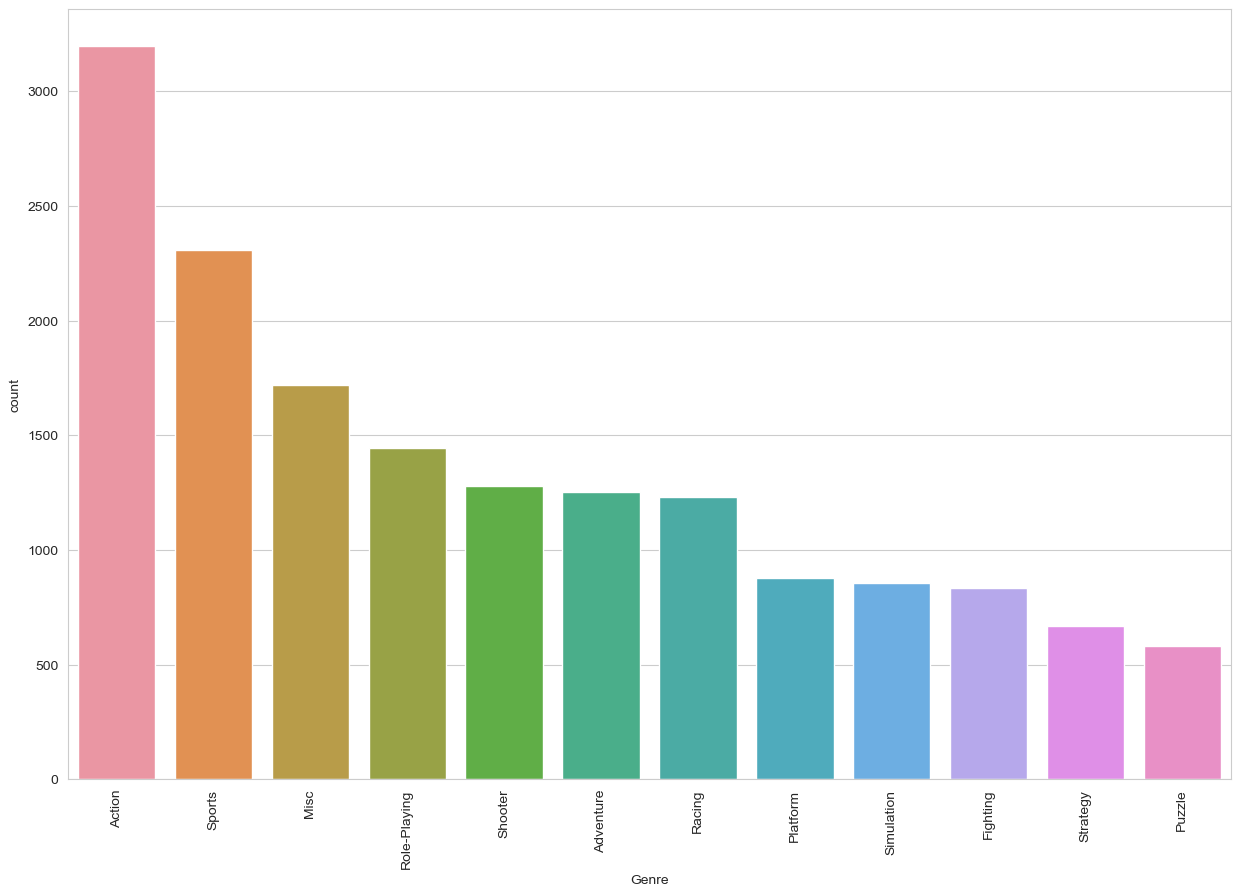

In [14]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order=data["Genre"].value_counts().index)
plt.xticks(rotation=90)

### Answer is => "Action" and "Sports"

- Me => I see, most of the people love action and sports game. in action 3316 and in sports 2346 games release. which one your favorite.
- Jaber => Action
- Me => I thought so too, Next?


# 2.Which year had the most game release?


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

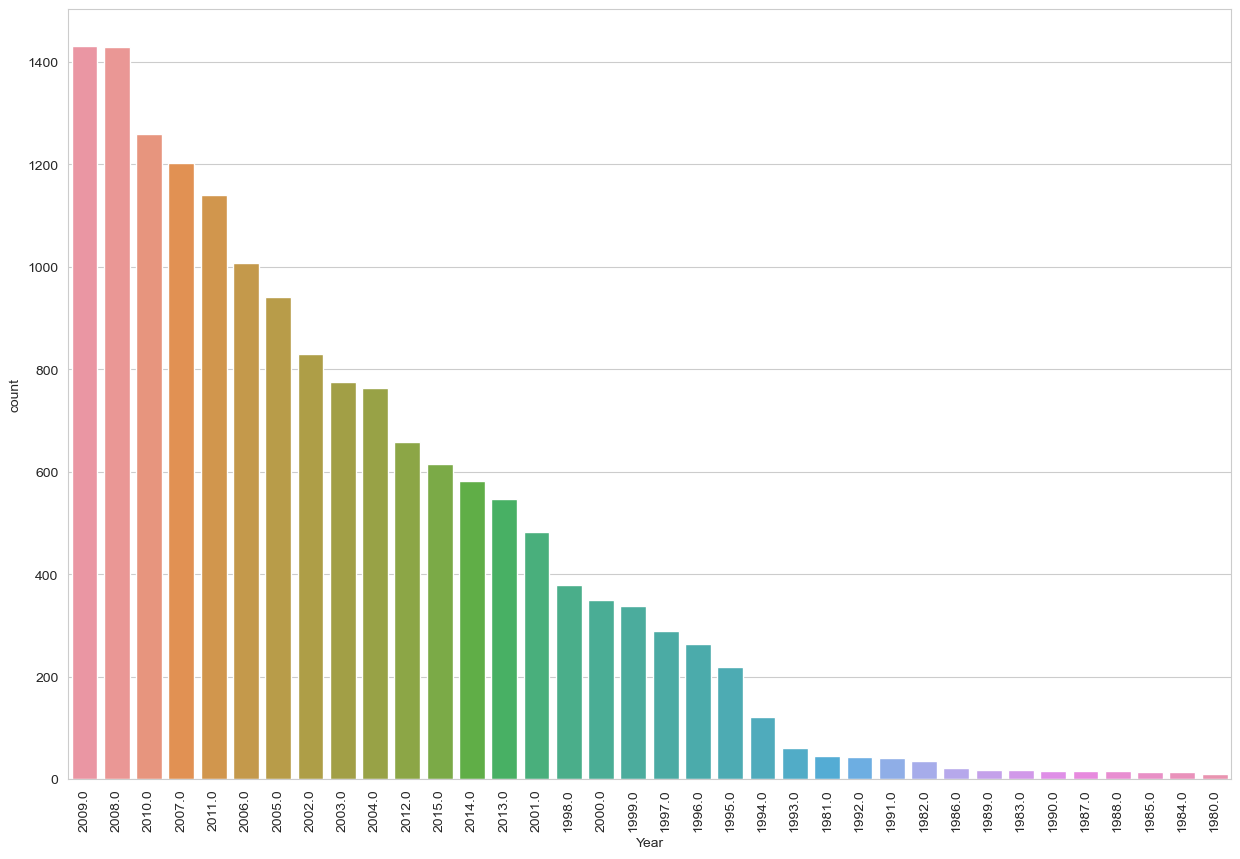

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(
    x="Year",
    data=data,
    order=data.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index,
)
plt.xticks(rotation=90)

### Answer is =>

1. 2009.0 -> 1431
2. 2008.0 -> 1428
3. 2010.0 -> 1259
4. 2007.0 -> 1202
5. 2011.0 -> 1139

Me => its seems like that 2008 to 2010 was game lovers years. and you know jaber, i can show you one interesting things also.


🧐❗ Order에 이렇게 쓰는 거 처음 봄
order=data.Year.value_counts().iloc[:5].index

<Axes: xlabel='Year', ylabel='count'>

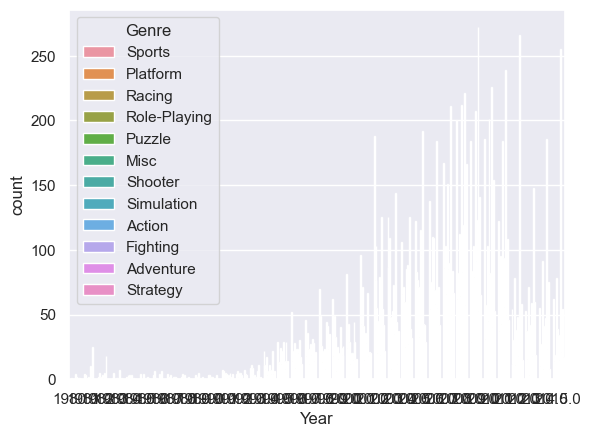

In [124]:
# order를 주지 않았을때.. 헉.. 
sns.countplot( x="Year", data=data, hue="Genre")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

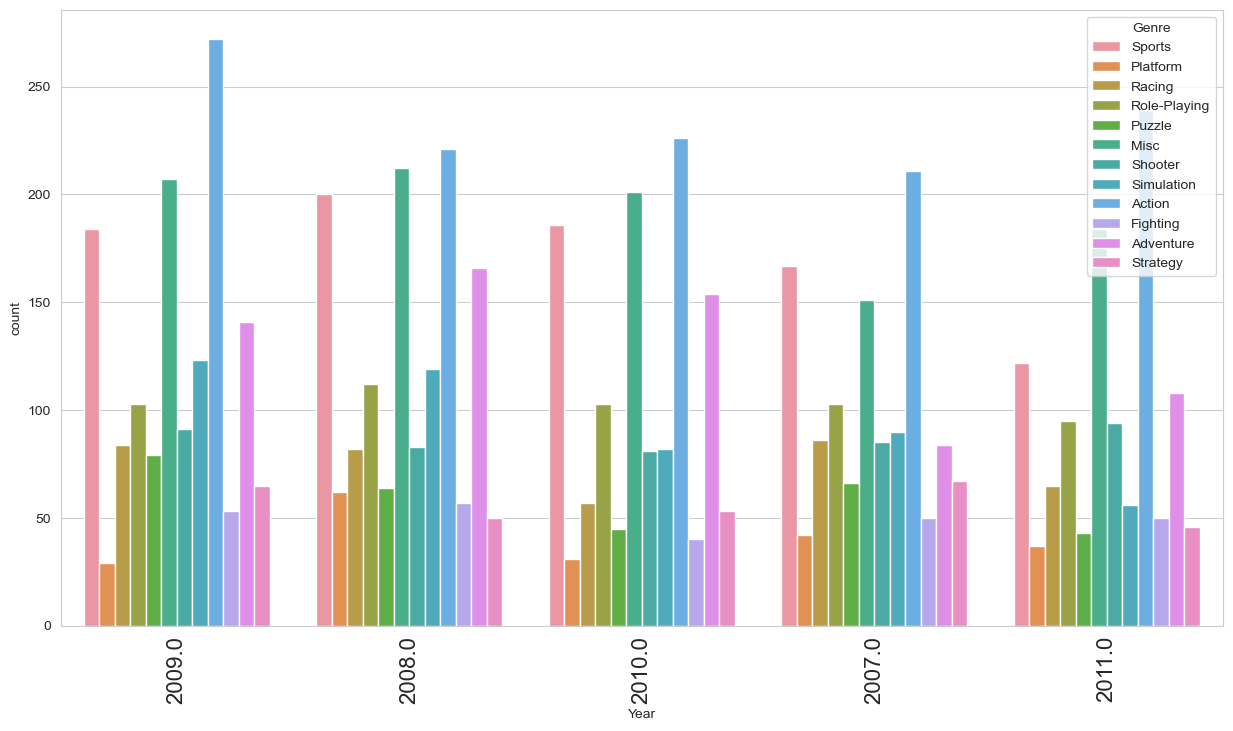

In [16]:
plt.figure(figsize=(15, 8))
sns.countplot(
    x="Year", data=data, hue="Genre", order=data.Year.value_counts().iloc[:5].index
)
plt.xticks(size=16, rotation=90)

- Me => ??
- Jaber => Wow thats nice and action was always top.
- Me => Ask your next question? i'm in mood now.


# 4.Which year had the highest sales worldwide?


In [17]:
data_year = data.groupby(by=["Year"])["Global_Sales"].sum()
data_year = data_year.reset_index()
# data_year.sort_values(by=['Global_Sales'], ascending=False)

🧐❗ 데이타를 먼저 테이블에 담아두고 그래프로 그리는 방식. good

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

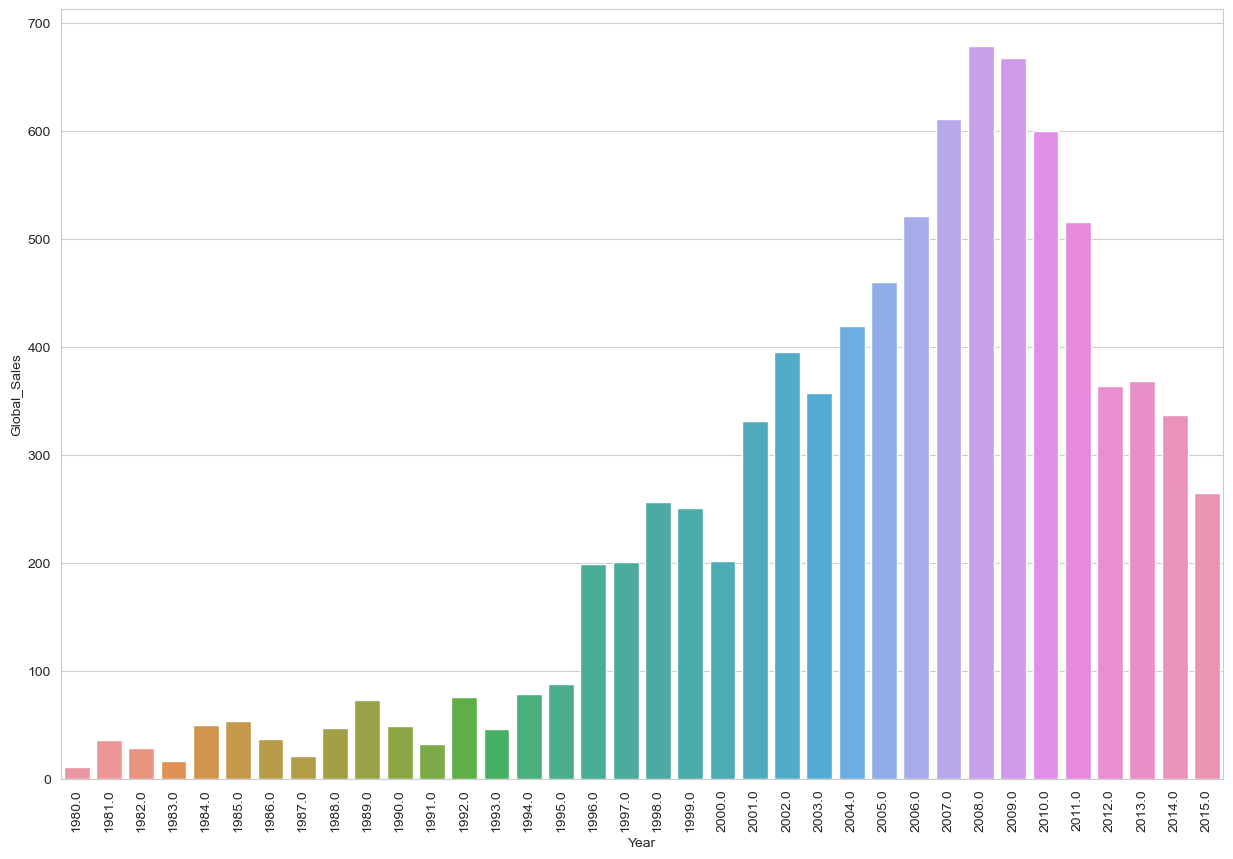

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

### Answer is =>

1. 2008.0 678.90
2. 2009.0 667.30
3. 2007.0 611.13
4. 2010.0 600.45
5. 2006.0 521.04

- interesting 2006 was not in top 5 game release year but it is in top 5 highest sale year


# 5.Which genre game has been released the most in a single year?


In [19]:
year_max_df = data.groupby(["Year", "Genre"]).size().reset_index(name="count")
year_max_idx = (
    year_max_df.groupby(["Year"])["count"].transform(max) == year_max_df["count"]
)
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(
    subset=["Year", "count"], keep="last"
).reset_index(drop=True)
# year_max_genre

0      False
1      False
2       True
3      False
4      False
       ...  
370    False
371    False
372    False
373    False
374    False
Name: count, Length: 375, dtype: bool

🧐❗❗ Wow Transform 시킨 거 처음봄   
year_max_df.groupby(["Year"])["count"].transform(max) == year_max_df["count"])

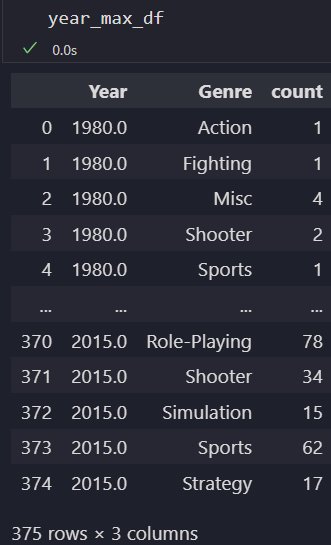   
max count와 같은 것만 true로 남음   
year_max_df.groupby(["Year"])["count"].transform(max) == year_max_df["count"]   
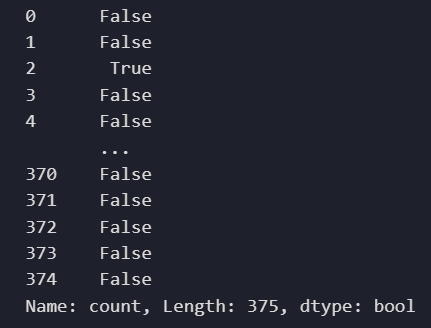

In [20]:
genre = year_max_genre["Genre"].values
# genre[0]
genre.shape

(36,)

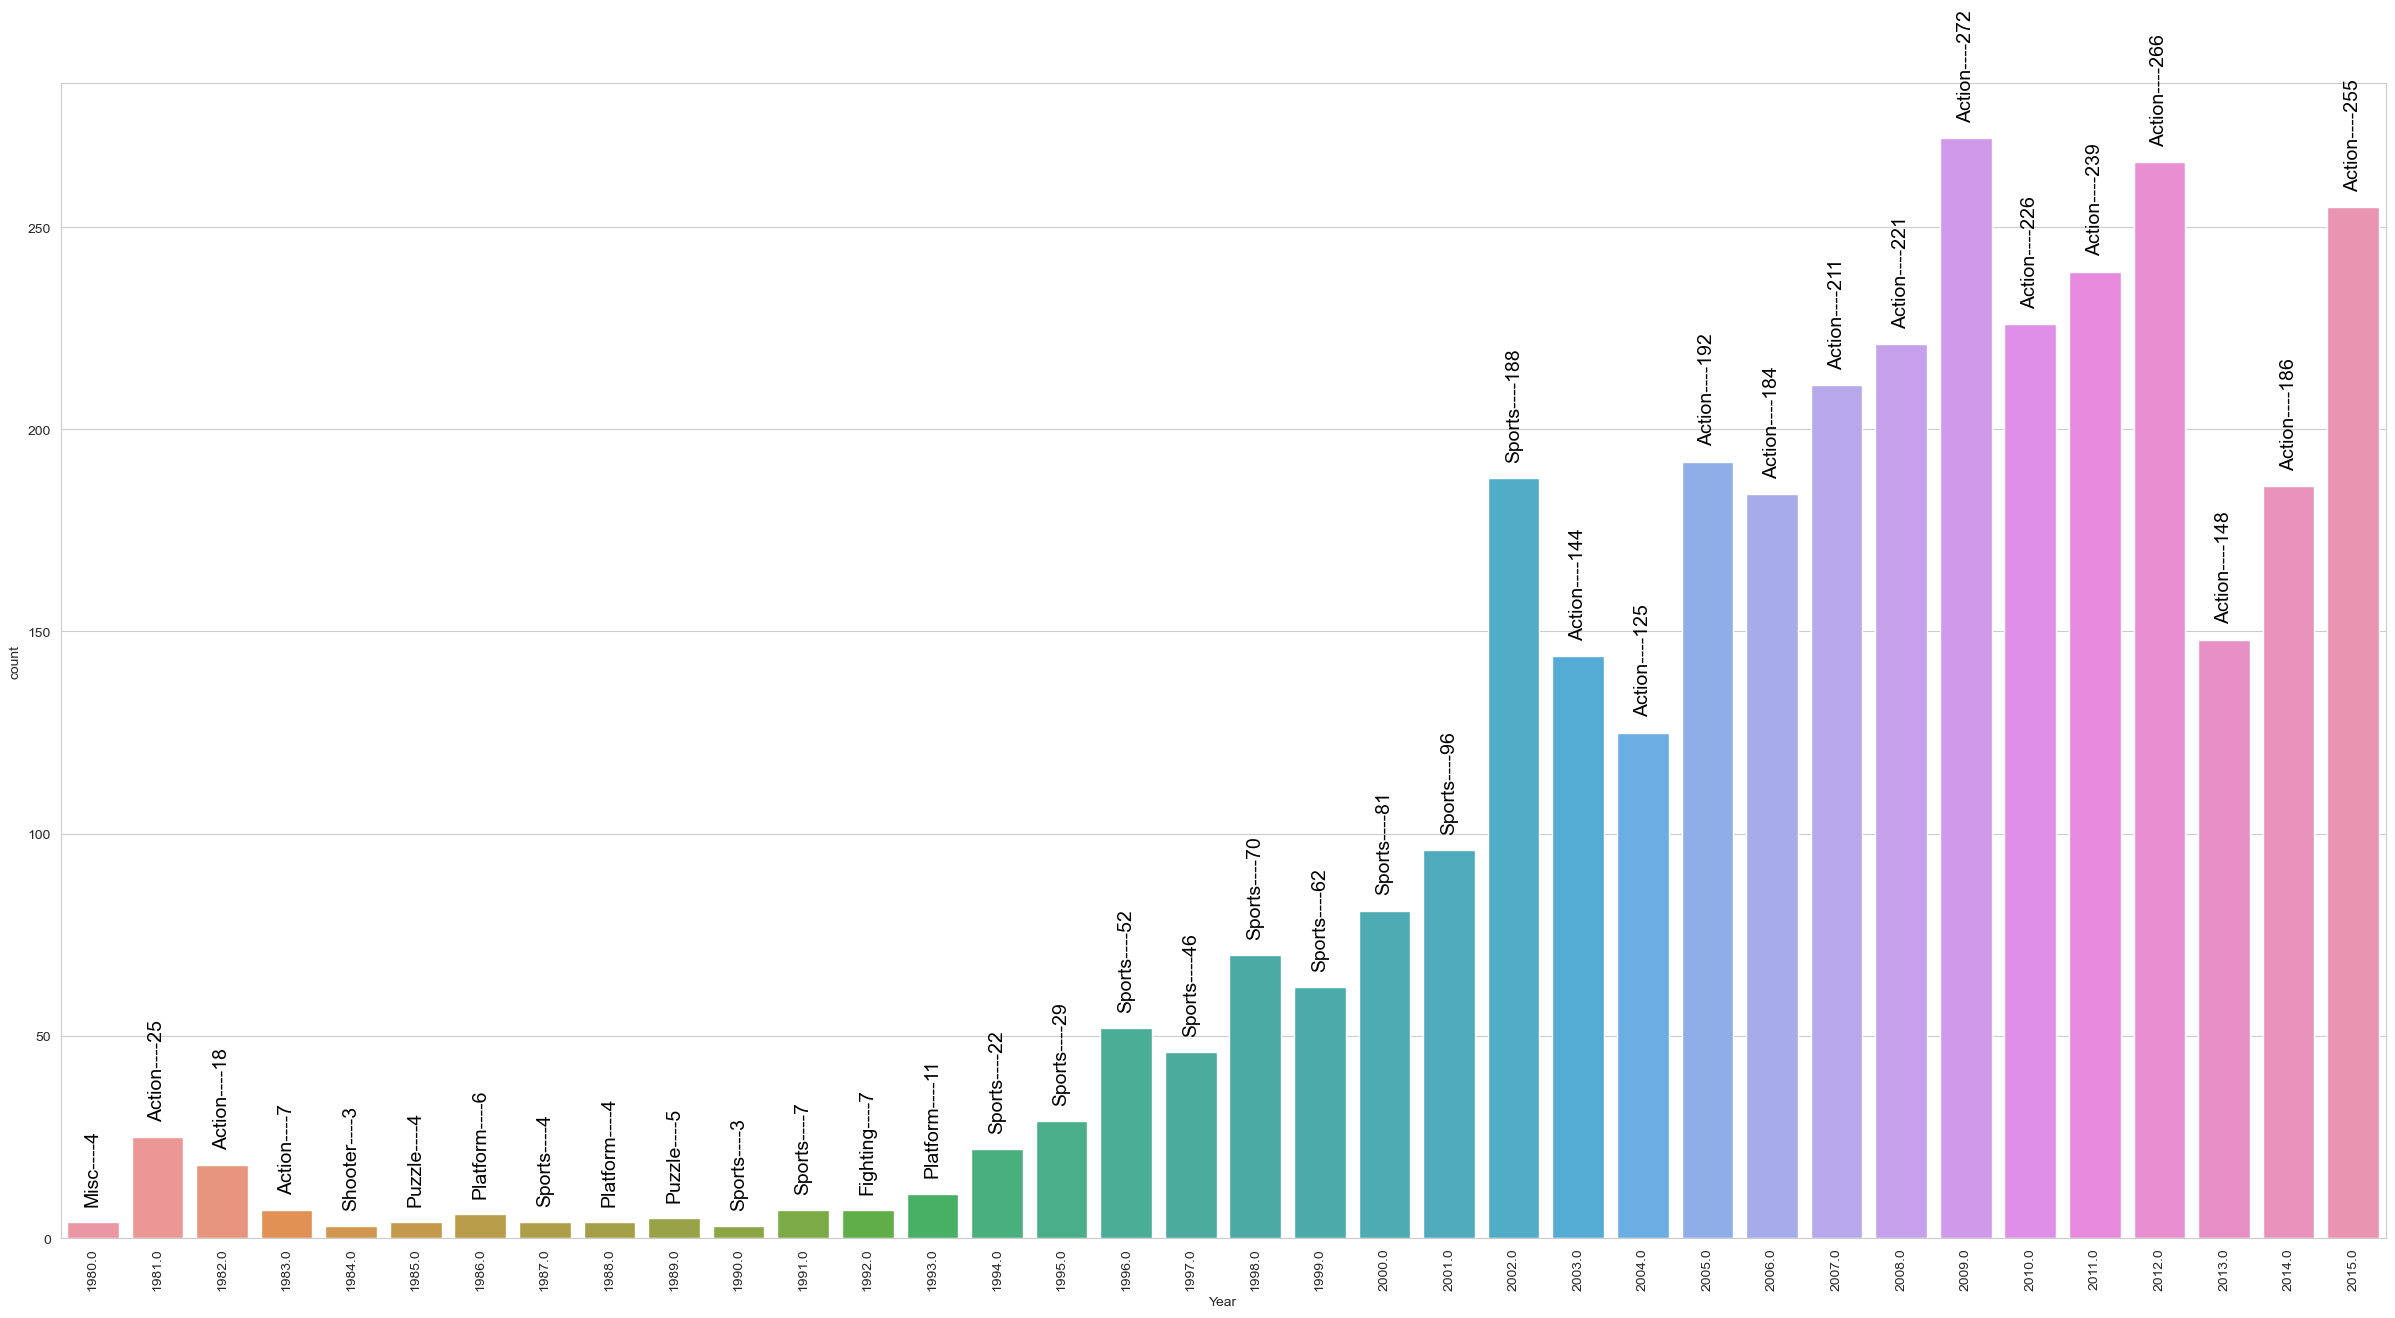

In [21]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x="Year", y="count", data=year_max_genre)
index = 0
for value in year_max_genre["count"].values:
    g.text(
        index,
        value + 5,
        str(genre[index] + "----" + str(value)),
        color="#000",
        size=14,
        rotation=90,
        ha="center",
    )
    index += 1

plt.xticks(rotation=90)
plt.show()

### 🧐⁉ if I do..
str(genre[index] + "----" + str(value)),  이렇게 genre[index]로 가져오지 않고 year_max_genre에 어차피 있는 genre_text로 가져와서 보여줌


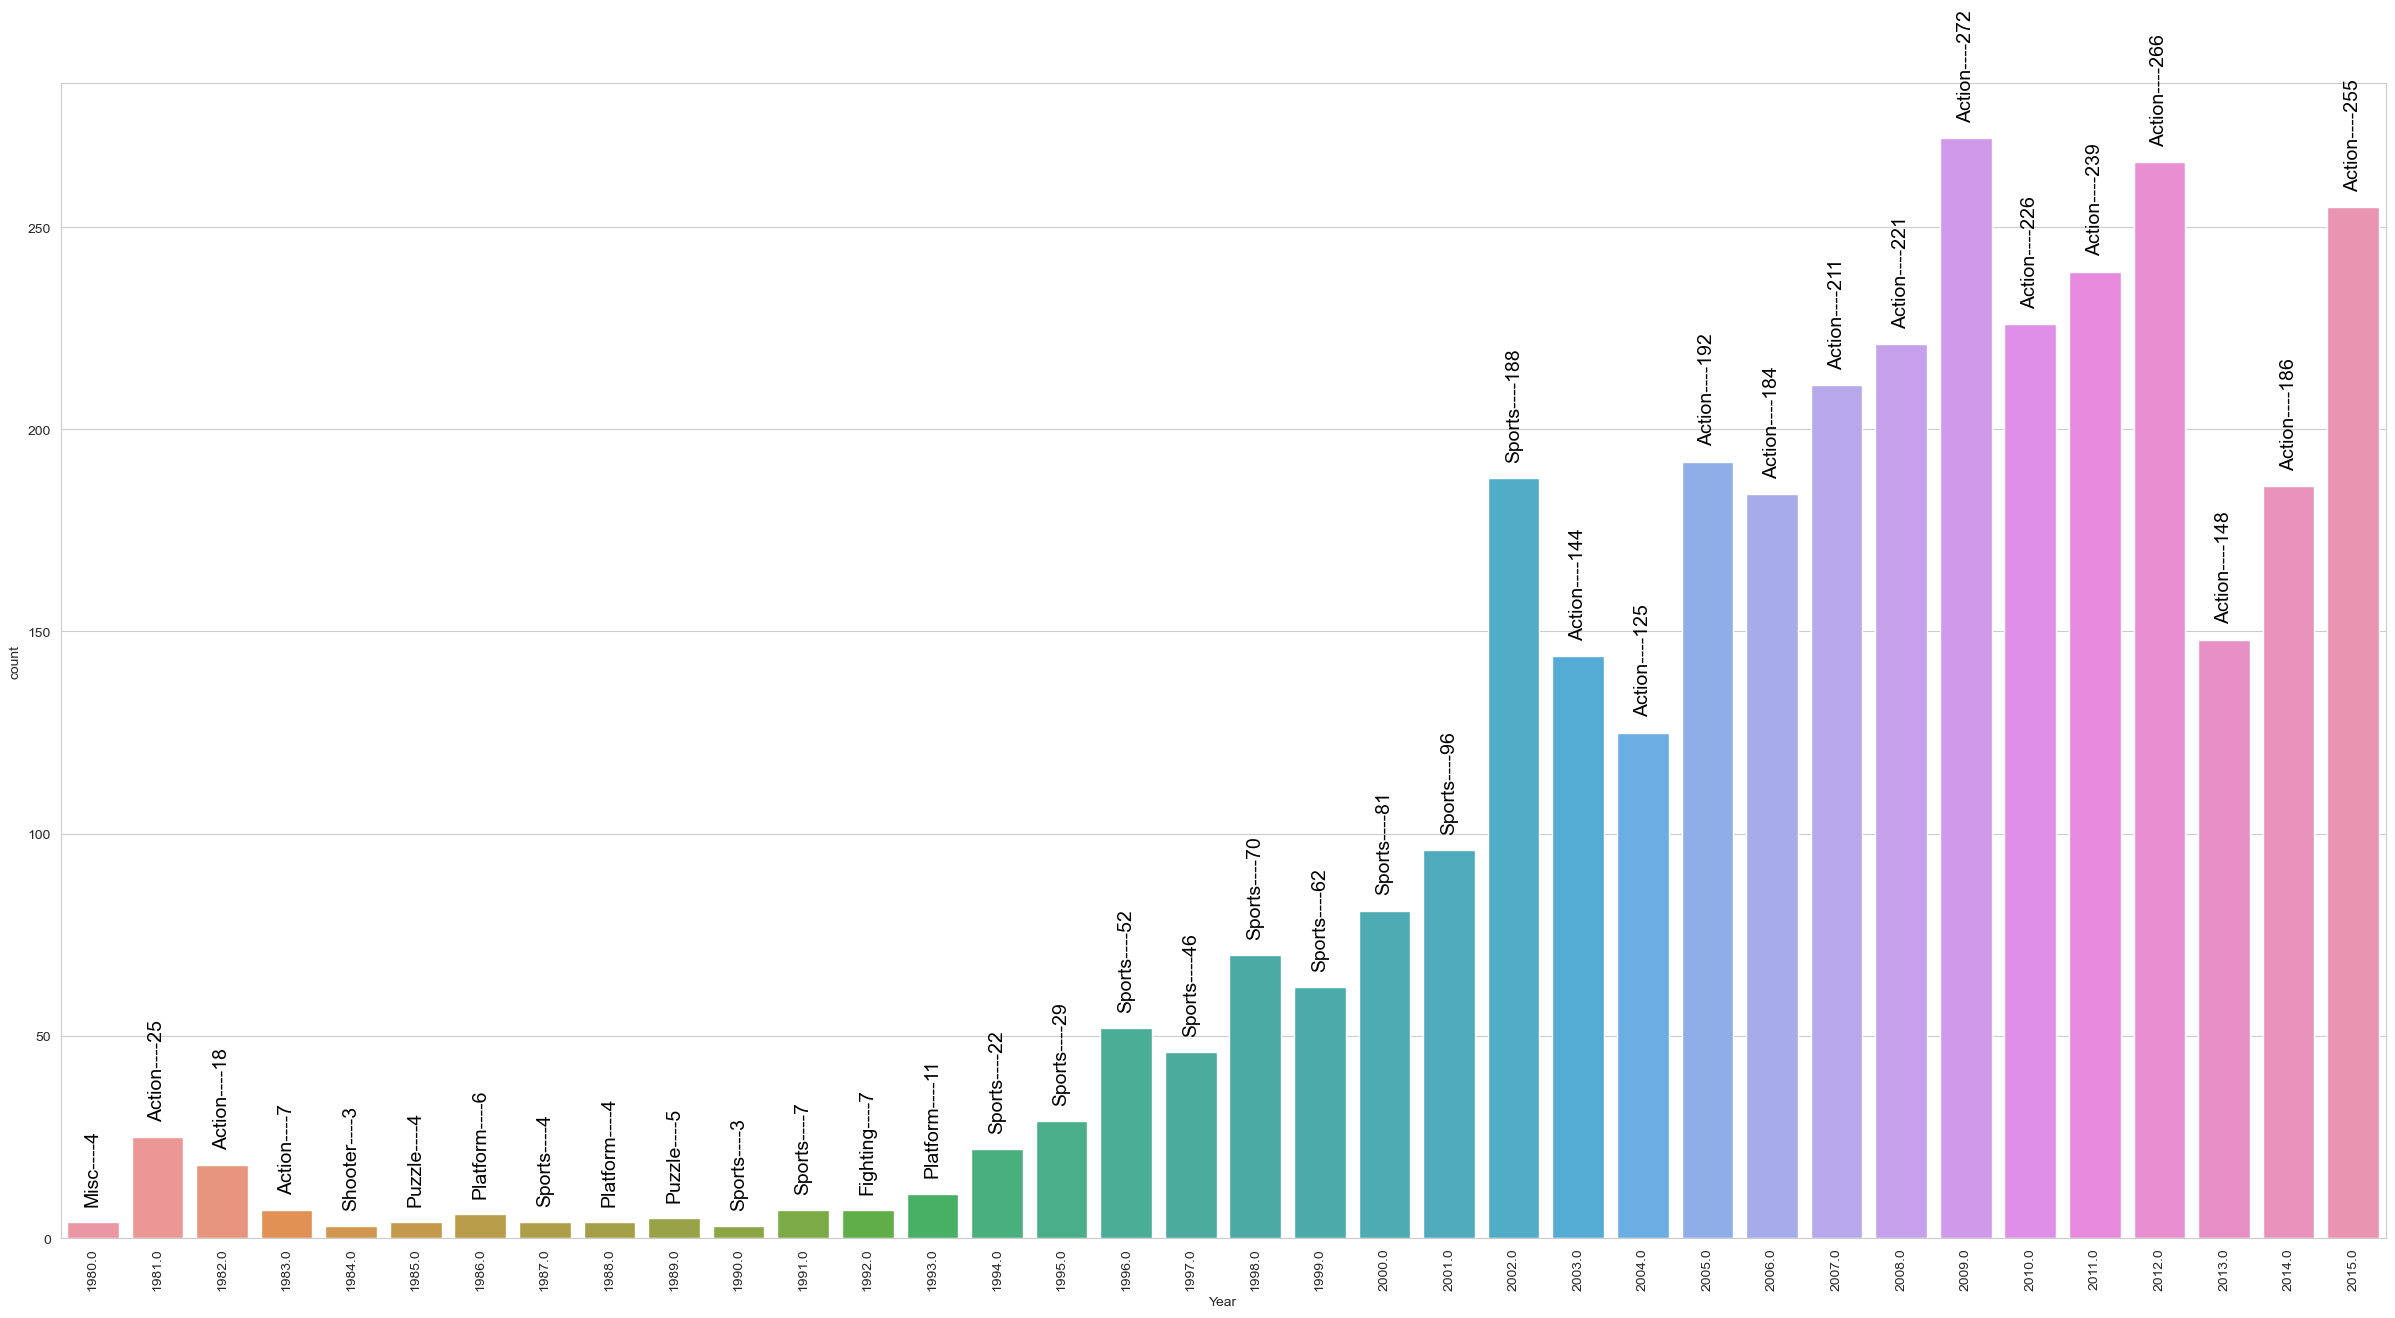

In [22]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x="Year", y="count", data=year_max_genre)
index = 0
for genre_text, value in year_max_genre[["Genre", "count"]].values:
    g.text(
        index,
        value + 5,
        str(genre_text + "----" + str(value)),
        color="#000",
        size=14,
        rotation=90,
        ha="center",
    )
    index += 1

plt.xticks(rotation=90)
plt.show()

Answer is => 2009 Action ---> 272 and 2012 Action ---> 266 games are release.


# 6.Which genre game has sold the most in a single year?


In [23]:
year_sale_dx = data.groupby(by=["Year", "Genre"])["Global_Sales"].sum().reset_index()
year_sale = (
    year_sale_dx.groupby(by=["Year"])["Global_Sales"].transform(max)
    == year_sale_dx["Global_Sales"]
)
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

🧐❗ 장르에서 Max인 것을 고를 때 Transform(max) 사용법~! 유용

In [24]:
genre = year_sale_max["Genre"]

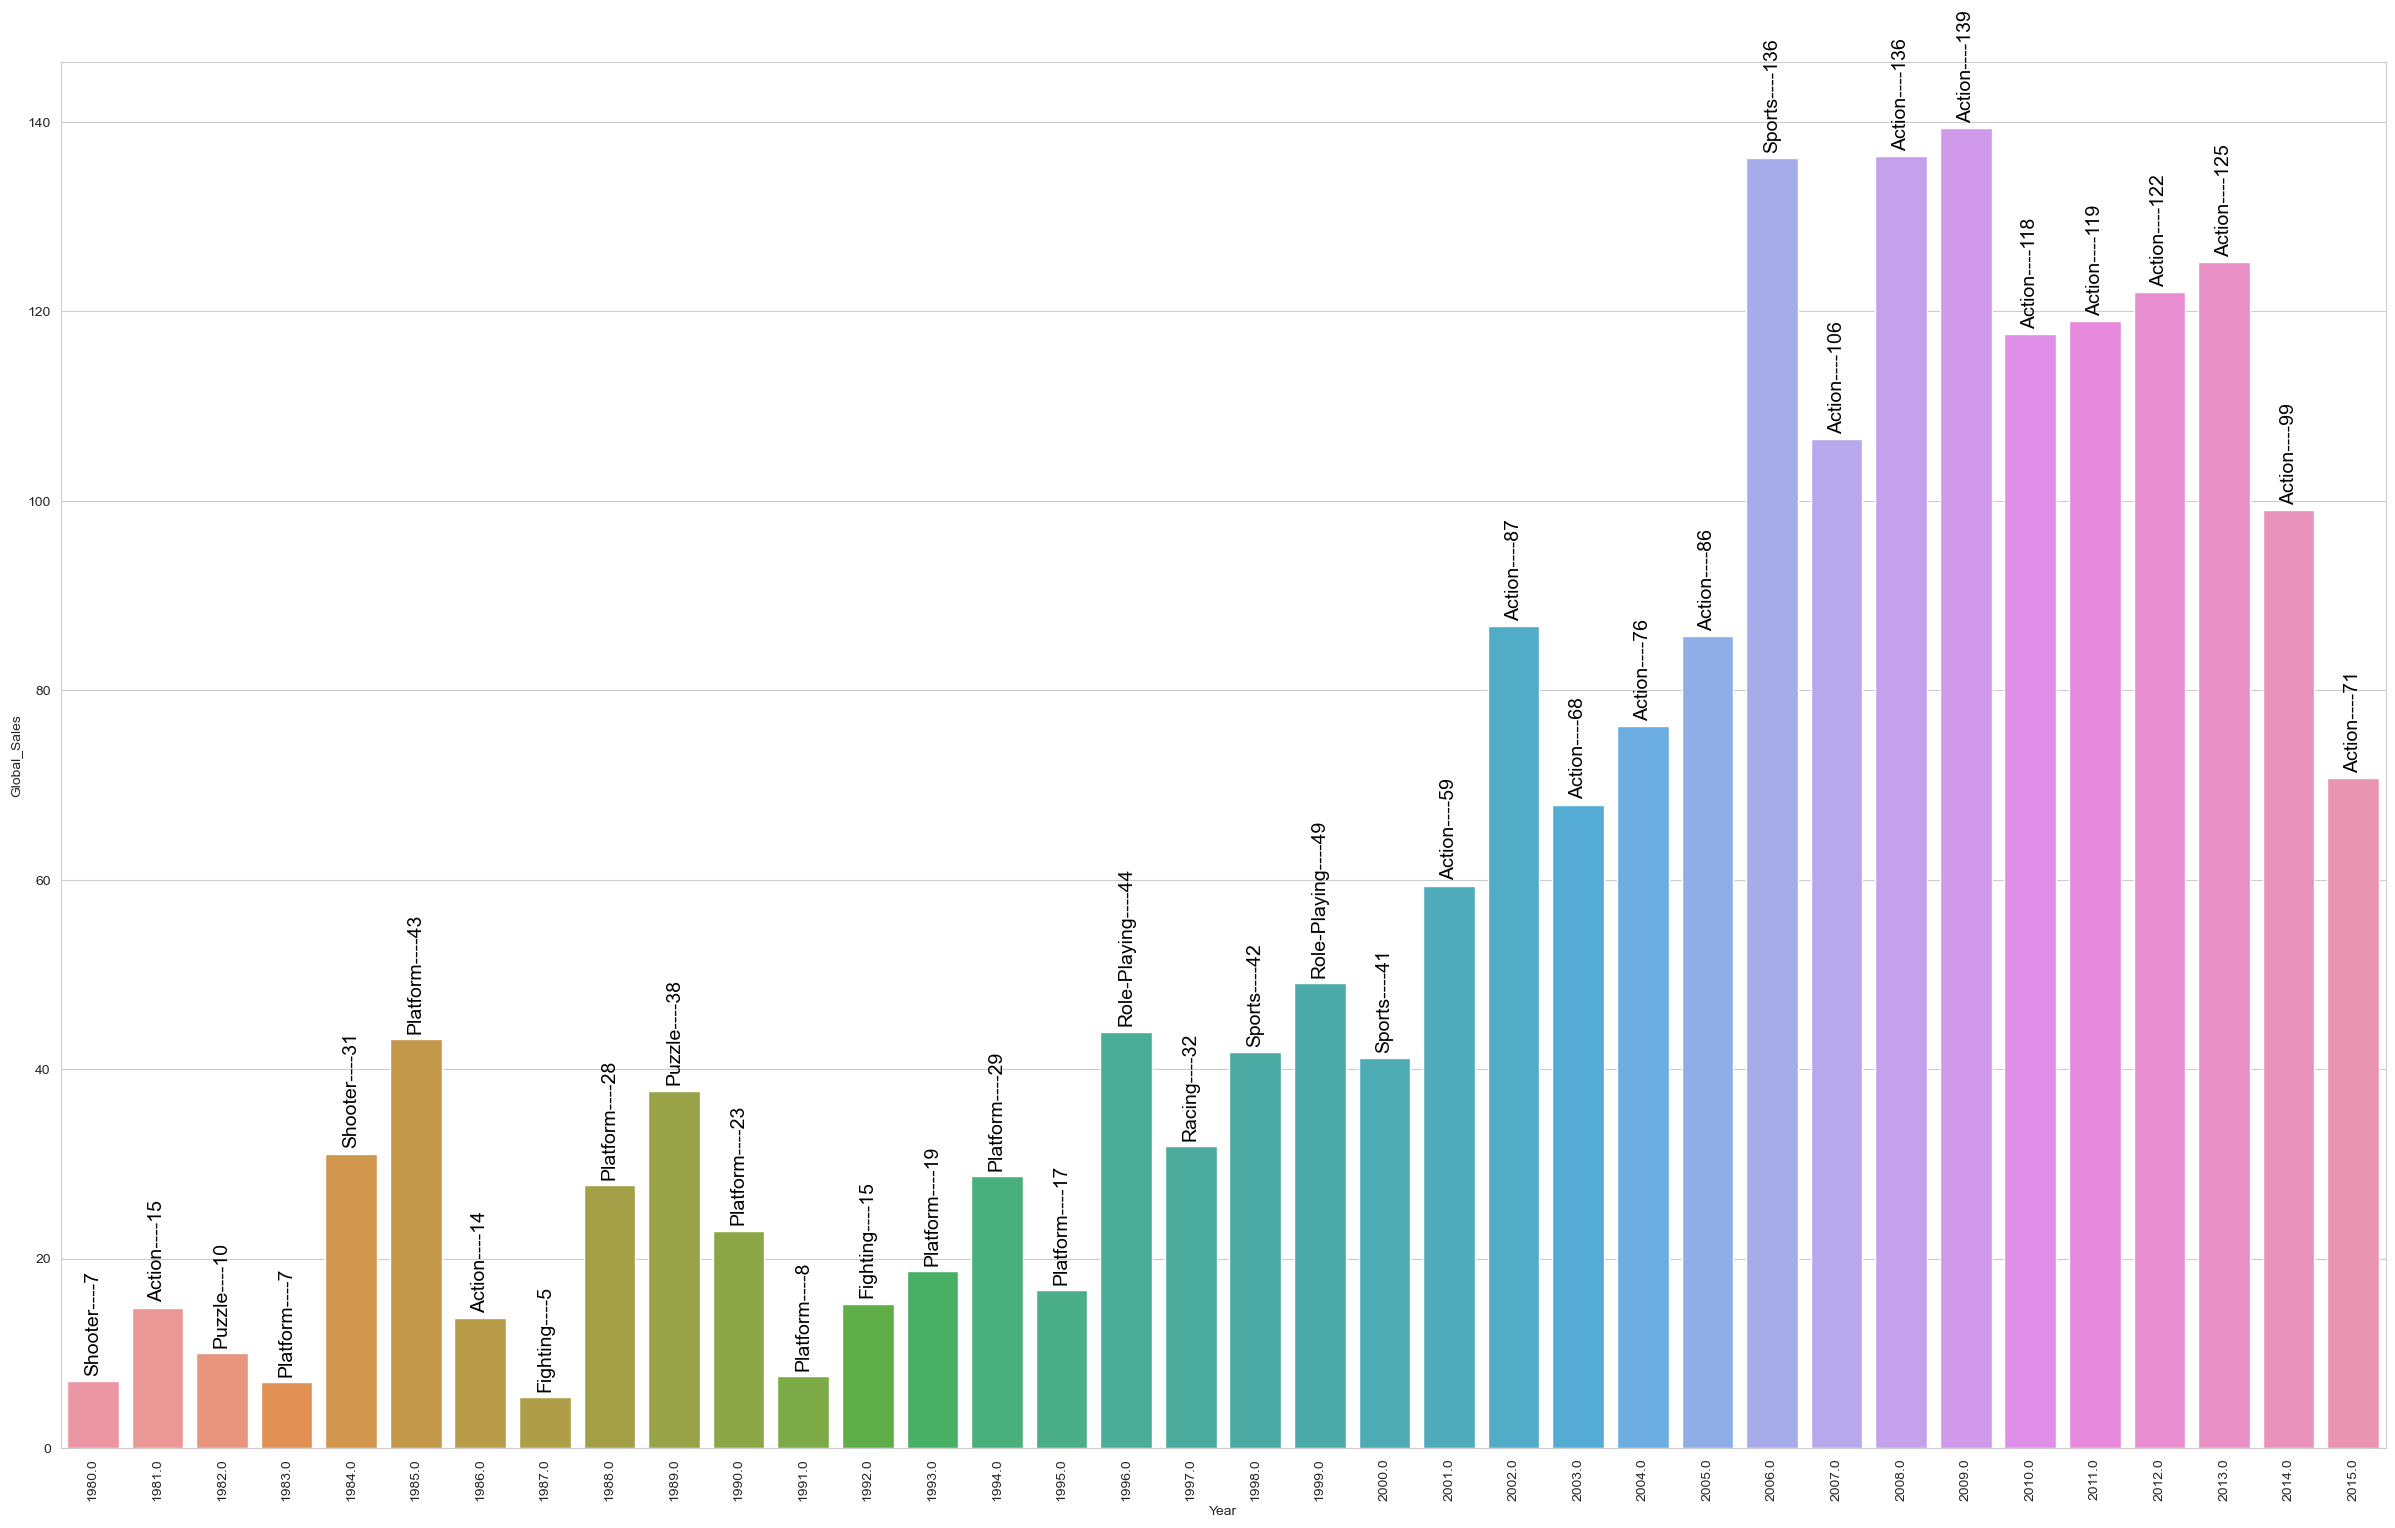

In [25]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x="Year", y="Global_Sales", data=year_sale_max)
index = 0
for value in year_sale_max["Global_Sales"]:
    g.text(
        index,
        value + 1,
        str(genre[index] + "----" + str(round(value))),
        color="#000",
        size=14,
        rotation=90,
        ha="center",
    )
    index = index + 1
plt.xticks(rotation=90)
plt.show()

- Answer is => 2009 Action ---> 139.36 million and 2008 Action ---> 136.39 miliion .


# 7.Which genre game have the highest sale price globally


In [26]:
data_genre = data.groupby(by=["Genre"])["Global_Sales"].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=["Global_Sales"], ascending=False)
# data_genre

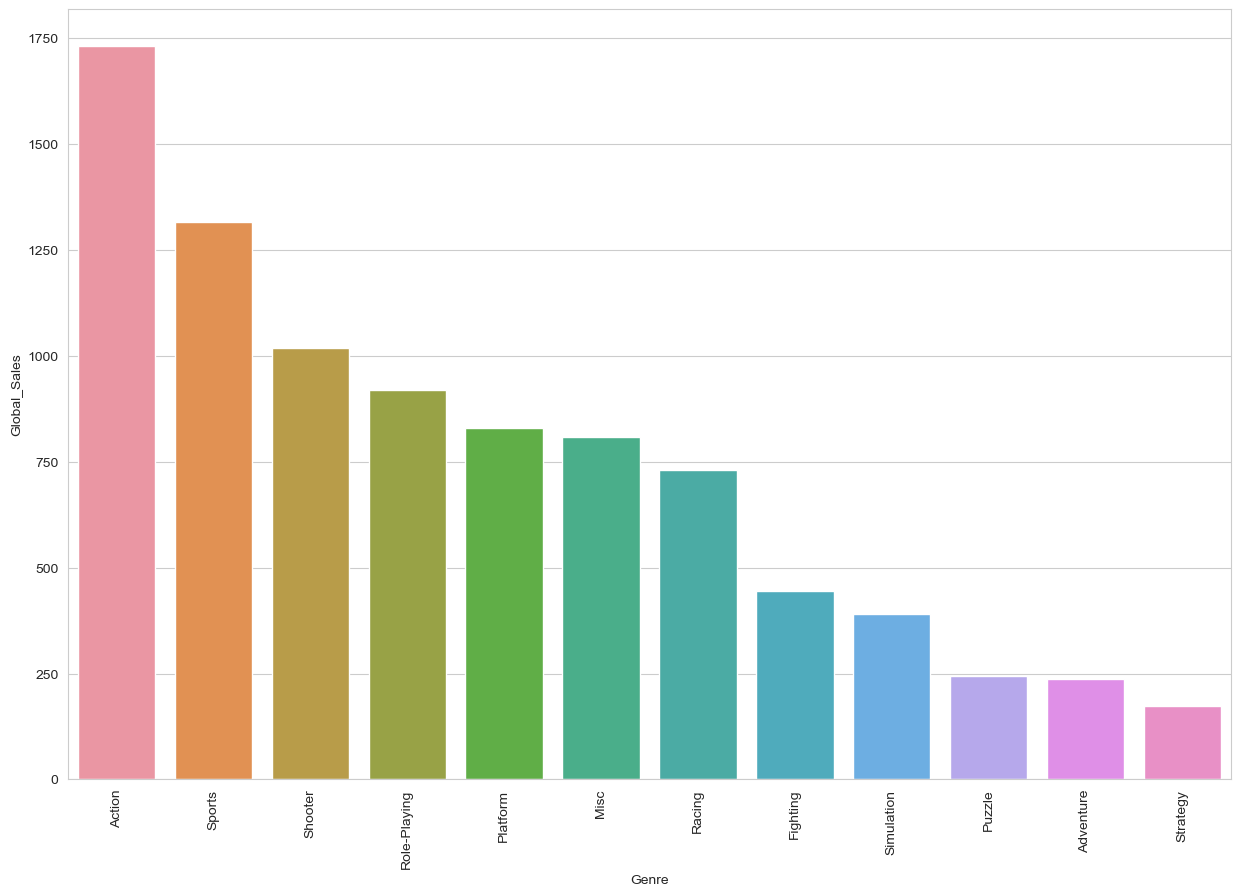

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
plt.show()

- Action and Sports are always in top. but in third whis is remarkable "Shooter", in count which was no 5


# 8.Which platfrom have the highest sale price globally


In [28]:
data_platform = data.groupby(by=["Platform"])["Global_Sales"].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=["Global_Sales"], ascending=False)
# data_platform

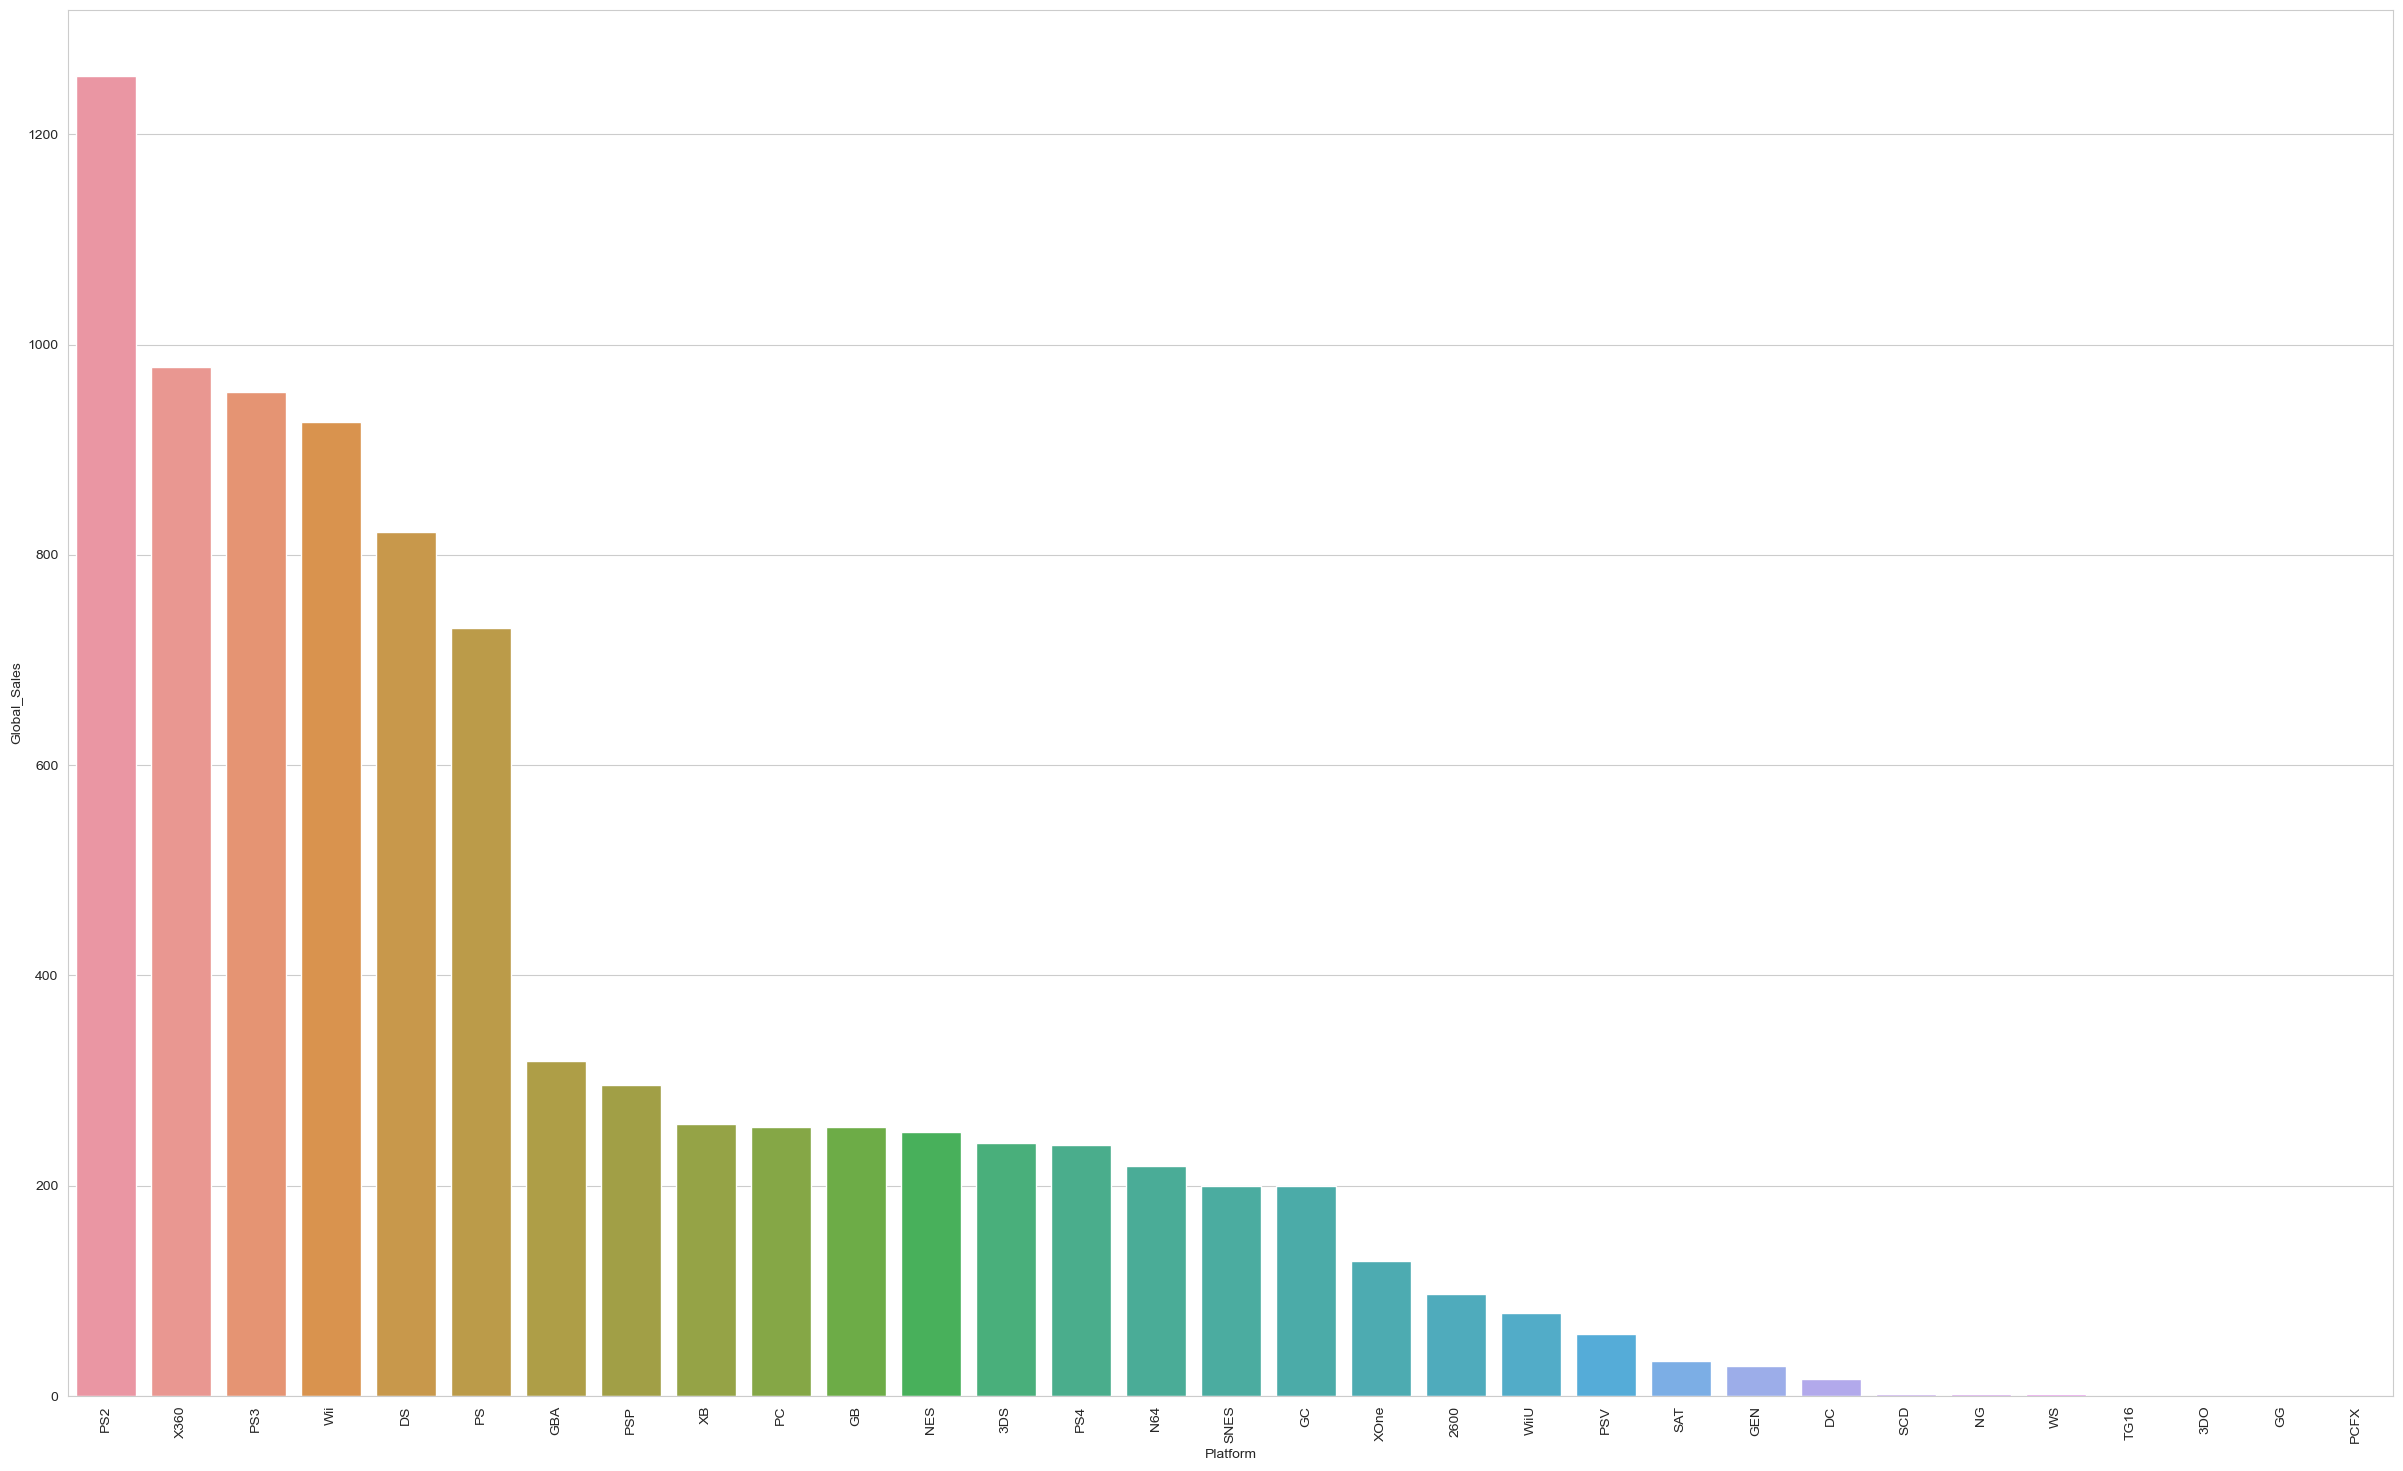

In [29]:
plt.figure(figsize=(30, 18))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)
plt.show()

- The winner is PS2


# 9.Which individual game have the highest sale price globally?


In [30]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[["Name", "Year", "Genre", "Global_Sales"]]
top_game_sale = top_game_sale.sort_values(by=["Global_Sales"], ascending=False)
top_game_sale

Name    Year         Genre  \
0                                     Wii Sports  2006.0        Sports   
1                              Super Mario Bros.  1985.0      Platform   
2                                 Mario Kart Wii  2008.0        Racing   
3                              Wii Sports Resort  2009.0        Sports   
4                       Pokemon Red/Pokemon Blue  1996.0  Role-Playing   
5                                         Tetris  1989.0        Puzzle   
6                          New Super Mario Bros.  2006.0      Platform   
7                                       Wii Play  2006.0          Misc   
8                      New Super Mario Bros. Wii  2009.0      Platform   
9                                      Duck Hunt  1984.0       Shooter   
10                                    Nintendogs  2005.0    Simulation   
11                                 Mario Kart DS  2005.0        Racing   
12                   Pokemon Gold/Pokemon Silver  1999.0  Role-Playing   
13                                       Wii Fit  2007.0        Sports   
14                                  Wii Fit Plus  2009.0        Sports   
15                            Kinect Adventures!  2010.0          Misc   
16                            Grand Theft Auto V  2013.0        Action   
17                 Grand Theft Auto: San Andreas  2004.0        Action   
18                             Super Mario World  1990.0      Platform   
19  Brain Age: Train Your Brain in Minutes a Day  2005.0          Misc   

    Global_Sales  
0          82.74  
1          40.24  
2          35.82  
3          33.00  
4          31.37  
5          30.26  
6          30.01  
7          29.02  
8          28.62  
9          28.31  
10         24.76  
11         23.42  
12         23.10  
13         22.72  
14         22.00  
15         21.82  
16         21.40  
17         20.81  
18         20.61  
19         20.22

In [31]:
import numpy as np

name = top_game_sale["Name"]
year = top_game_sale["Year"]
y = np.arange(0, 20)

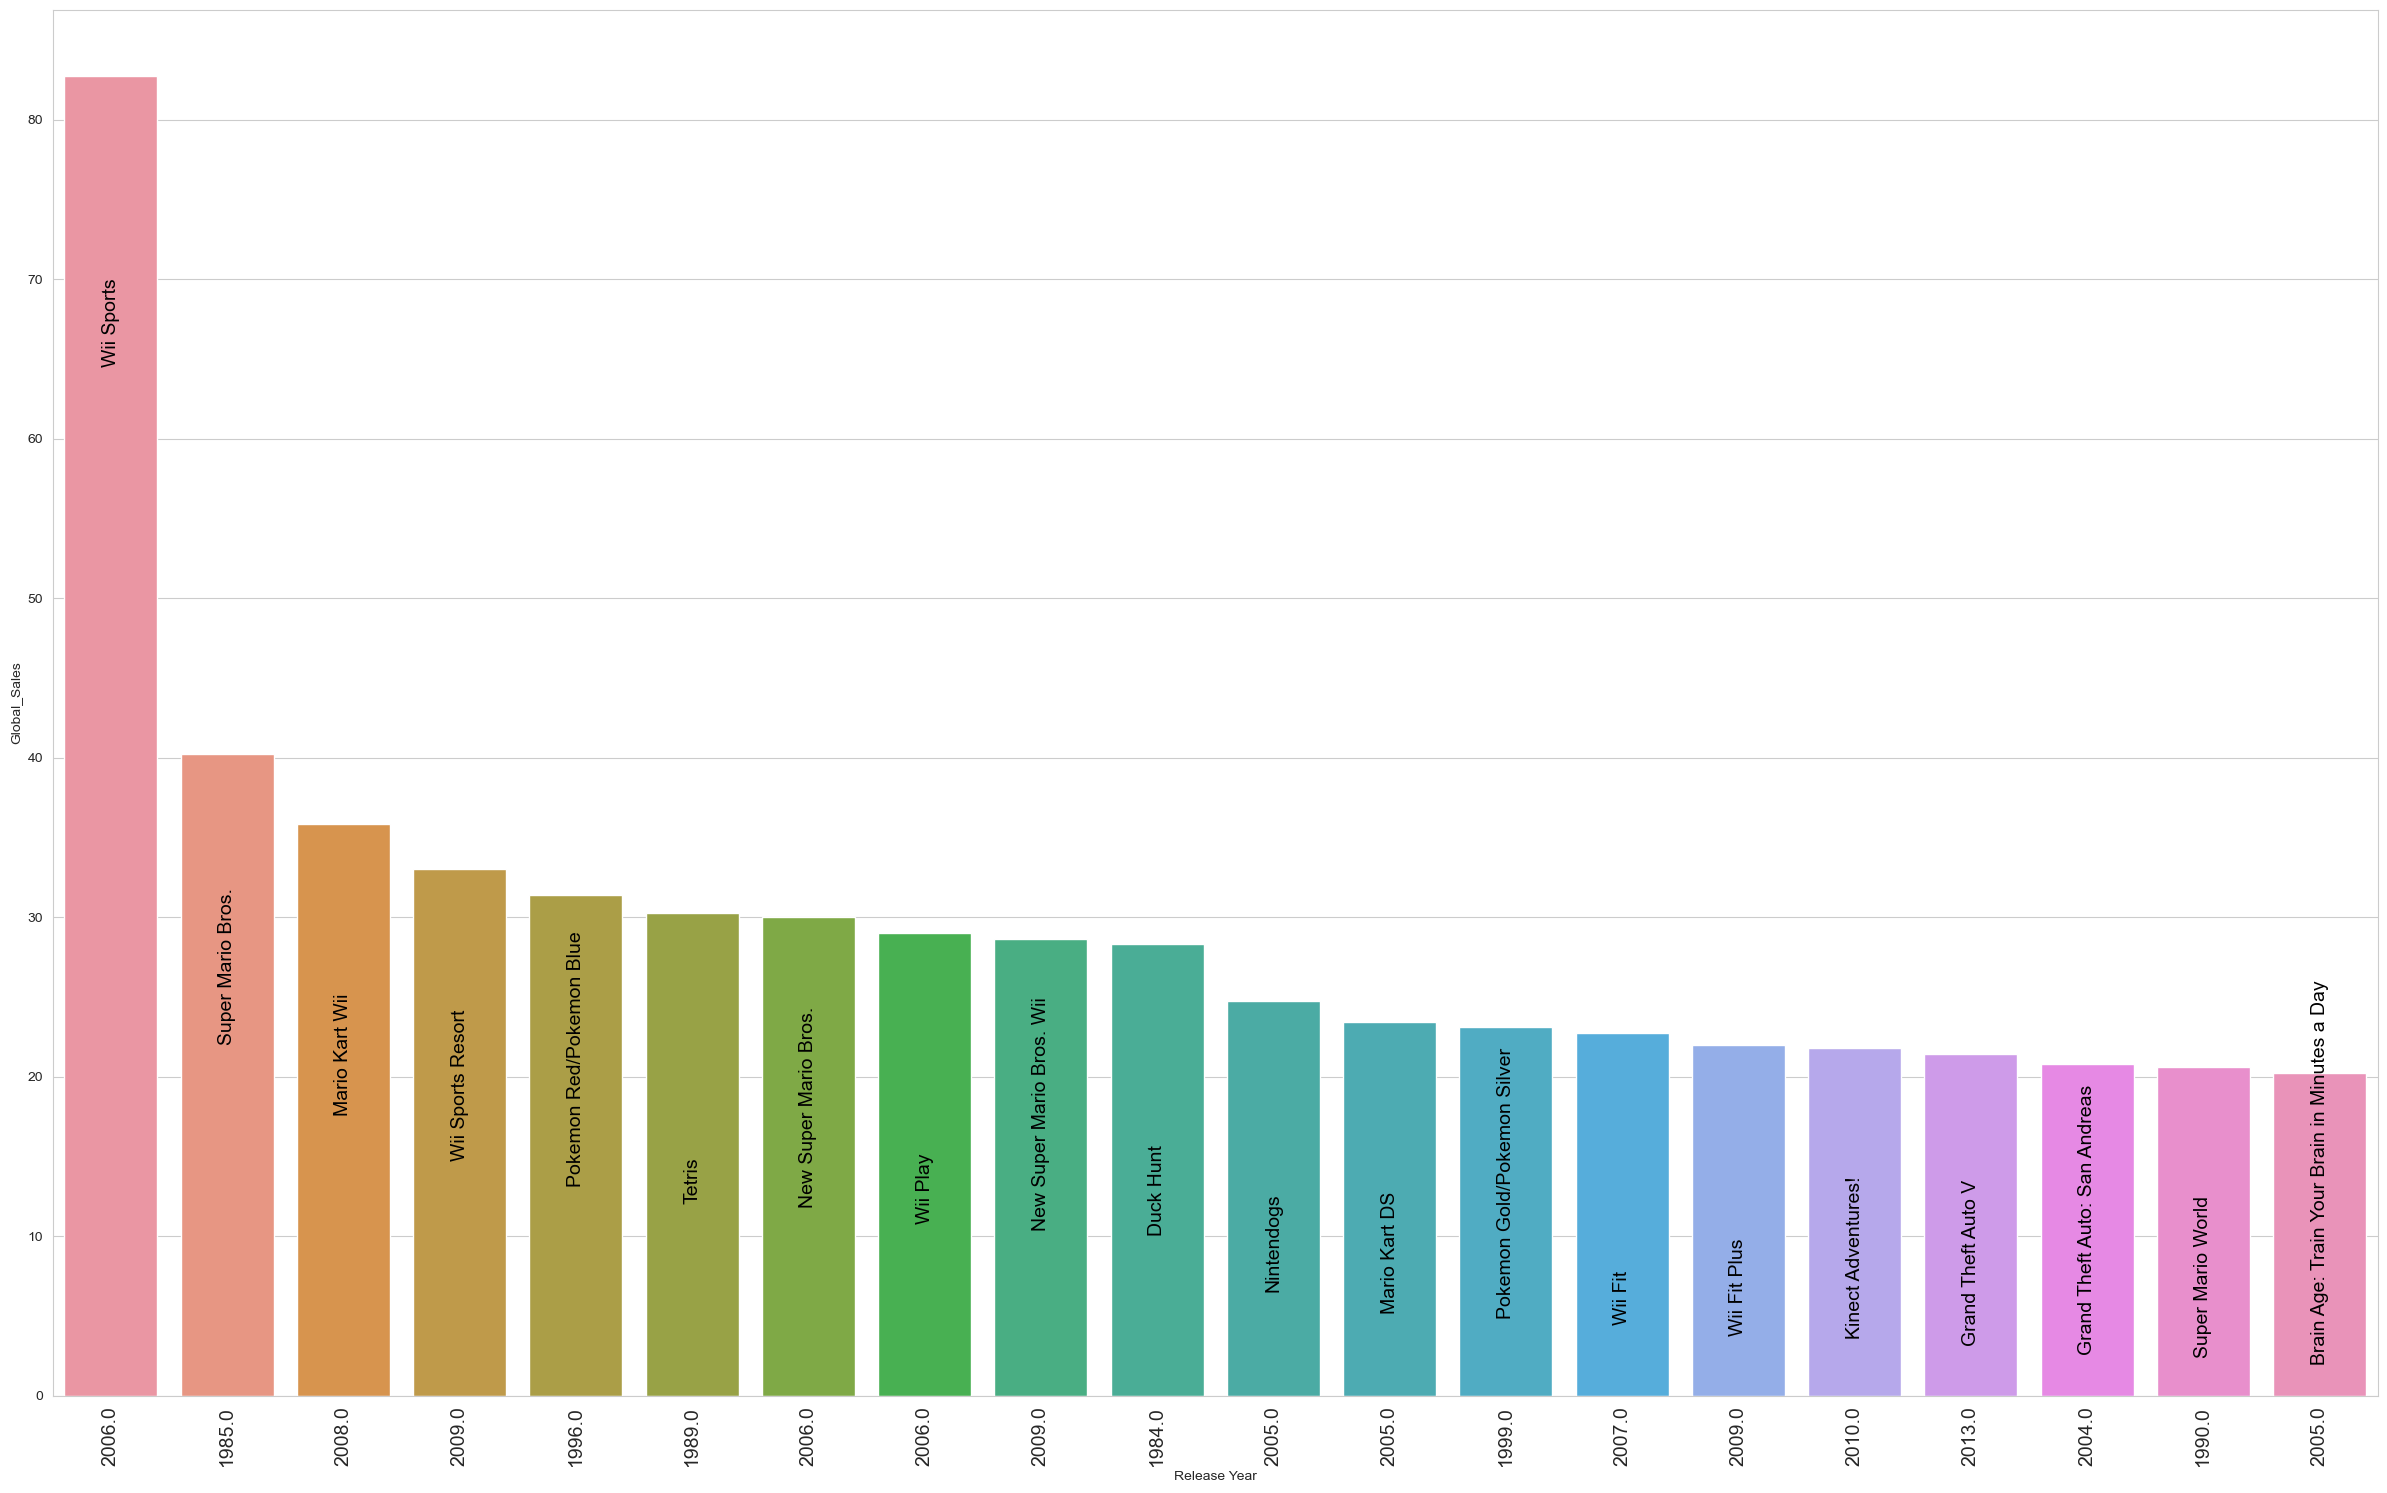

In [32]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x="Name", y="Global_Sales", data=top_game_sale)
index = 0
for value in top_game_sale["Global_Sales"]:
    g.text(
        index, value - 18, name[index], color="#000", size=14, rotation=90, ha="center"
    )
    index = index + 1
plt.xticks(y, top_game_sale["Year"], fontsize=14, rotation=90)
plt.xlabel("Release Year")
plt.show()

- And The winner is Wii Sports

ME => Ok jaber i thought you asked me too many questions. Can you hold it for time being, i will show you something interesting  
 Jaber => Ok, i have no - problem let's start


# 10.Sales compearison by genre


In [33]:
comp_genre = data[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
# comp_genre
comp_map = comp_genre.groupby(by=["Genre"]).sum()
# comp_map

🧐❗ heatmap을 correlation을 볼때 주로 사용했는데, 서로간의 상관관계를 이리보는 것도 좋군

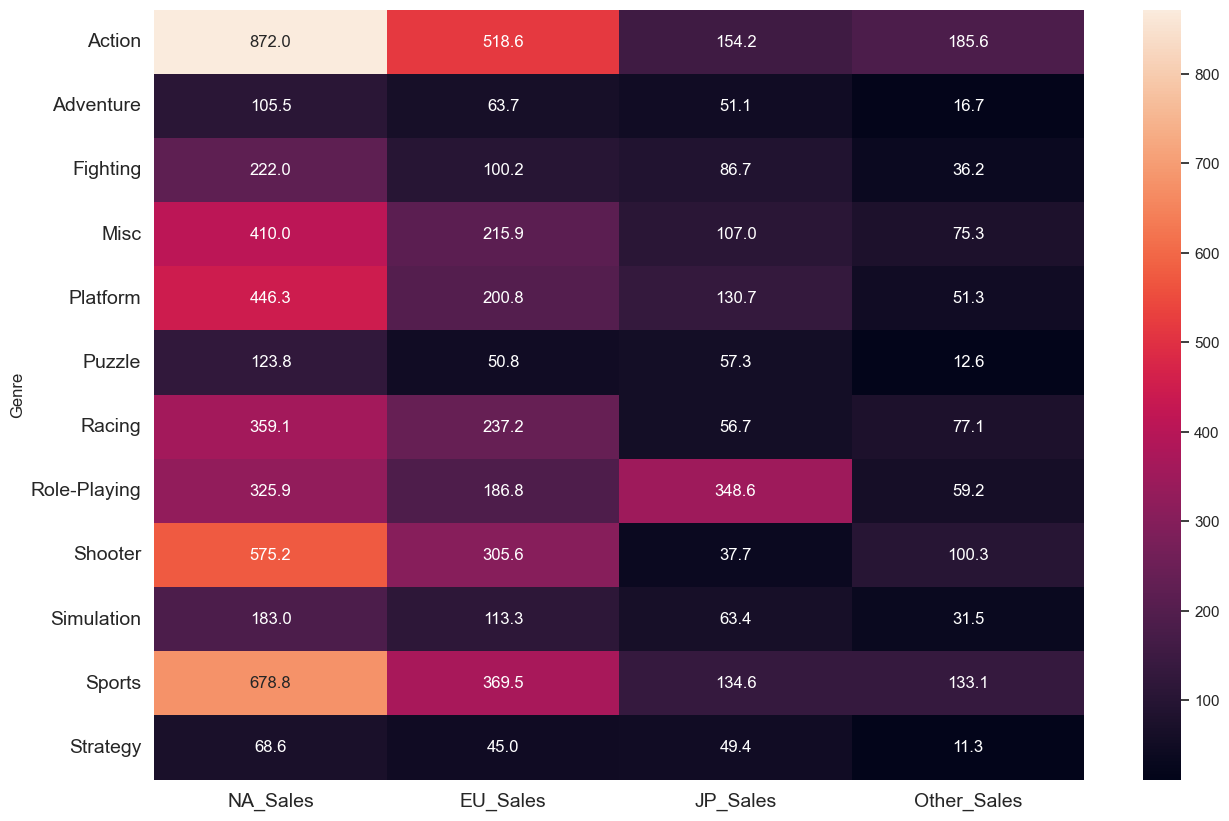

In [34]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt=".1f")

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [128]:
comp_map

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          871.96    518.64    154.15       185.55
Adventure       105.46     63.74     51.10        16.70
Fighting        221.99    100.17     86.71        36.22
Misc            410.02    215.89    106.95        75.29
Platform        446.26    200.76    130.66        51.28
Puzzle          123.78     50.78     57.31        12.55
Racing          359.09    237.25     56.68        77.08
Role-Playing    325.89    186.77    348.64        59.17
Shooter         575.16    305.57     37.67       100.27
Simulation      183.04    113.29     63.40        31.50
Sports          678.78    369.49    134.59       133.05
Strategy         68.59     45.02     49.41        11.32

In [35]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(
    comp_table,
    id_vars=["Genre"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name="Sale_Area",
    value_name="Sale_Price",
)
comp_table.head()

Genre Sale_Area  Sale_Price
0     Action  NA_Sales      871.96
1  Adventure  NA_Sales      105.46
2   Fighting  NA_Sales      221.99
3       Misc  NA_Sales      410.02
4   Platform  NA_Sales      446.26

🧐❗ pd.melt 사용법을 처음봄~!!   
이거 뭔가.. 장르별, 지역별 판매액인데, 컬럼들을 녹여서 재배치하는 느낌이다.   
id 변수, 그 변수의 종류들을 주고, 종류를 표시할 변수의 이름을 주고, 그 각 이름별 값을 판매액으로 주고 있다. 

In [36]:
# pd.melt , dataFrame.melt 함수

df = pd.DataFrame(
    {"A": {0: "a", 1: "b", 2: "c"}, "B": {0: 1, 1: 3, 2: 5}, "C": {0: 2, 1: 4, 2: 6}}
)

pd.melt(
    df, id_vars=["A"], value_vars=["B"], var_name="myVarname", value_name="myValname"
)

A myVarname  myValname
0  a         B          1
1  b         B          3
2  c         B          5

<Axes: xlabel='Genre', ylabel='Sale_Price'>

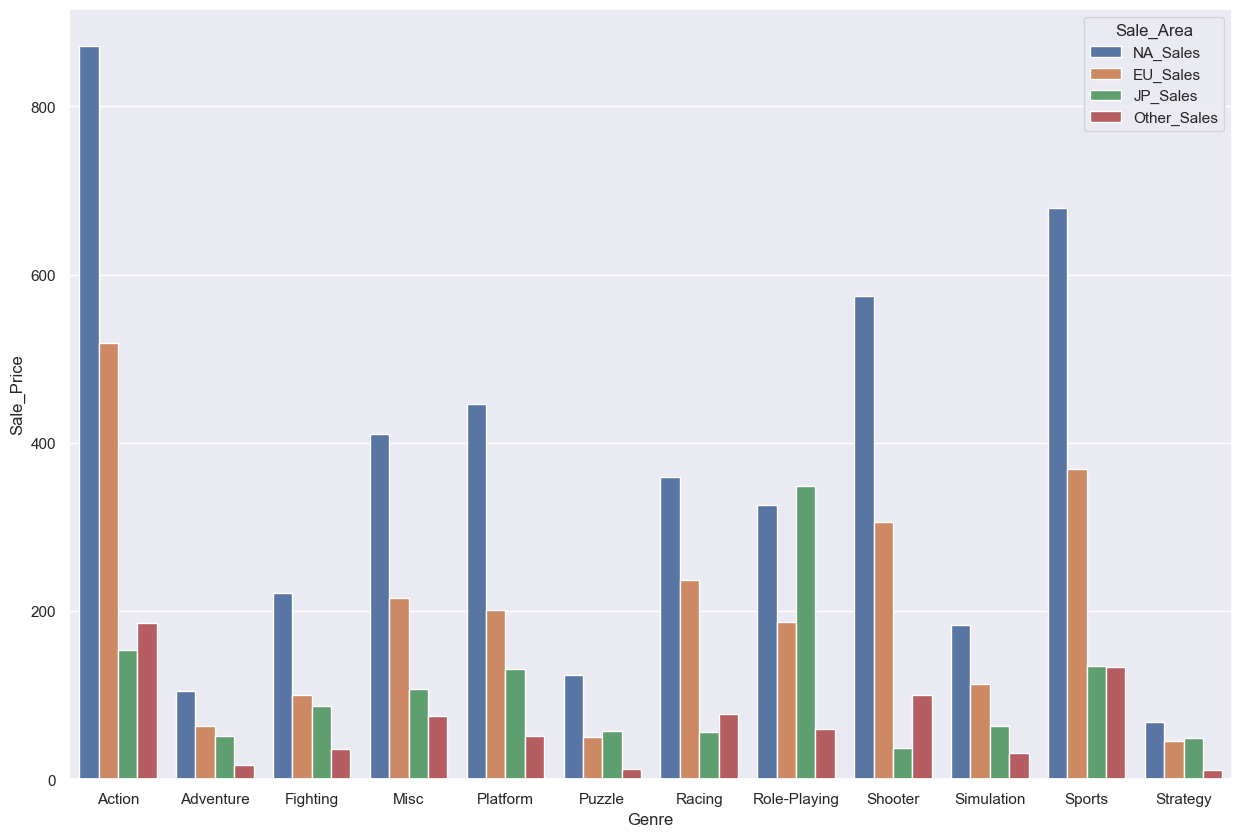

In [37]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Sale_Price", hue="Sale_Area", data=comp_table)

Me => See, Here Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time. Its look like they love video games most


# 11.Sales compearison by platform


In [38]:
comp_platform = data[["Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
comp_platform.head()

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      Wii     41.49     29.02      3.77         8.46
1      NES     29.08      3.58      6.81         0.77
2      Wii     15.85     12.88      3.79         3.31
3      Wii     15.75     11.01      3.28         2.96
4       GB     11.27      8.89     10.22         1.00

In [39]:
comp_platform = comp_platform.groupby(["Platform"]).sum().reset_index()

In [40]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(
    comp_platform,
    id_vars=["Platform"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name="Sale_Area",
    value_name="Sale_Price",
)
comp_table.head()

Platform Sale_Area  Sale_Price
0     2600  NA_Sales       90.60
1      3DO  NA_Sales        0.00
2      3DS  NA_Sales       78.04
3       DC  NA_Sales        5.43
4       DS  NA_Sales      390.44

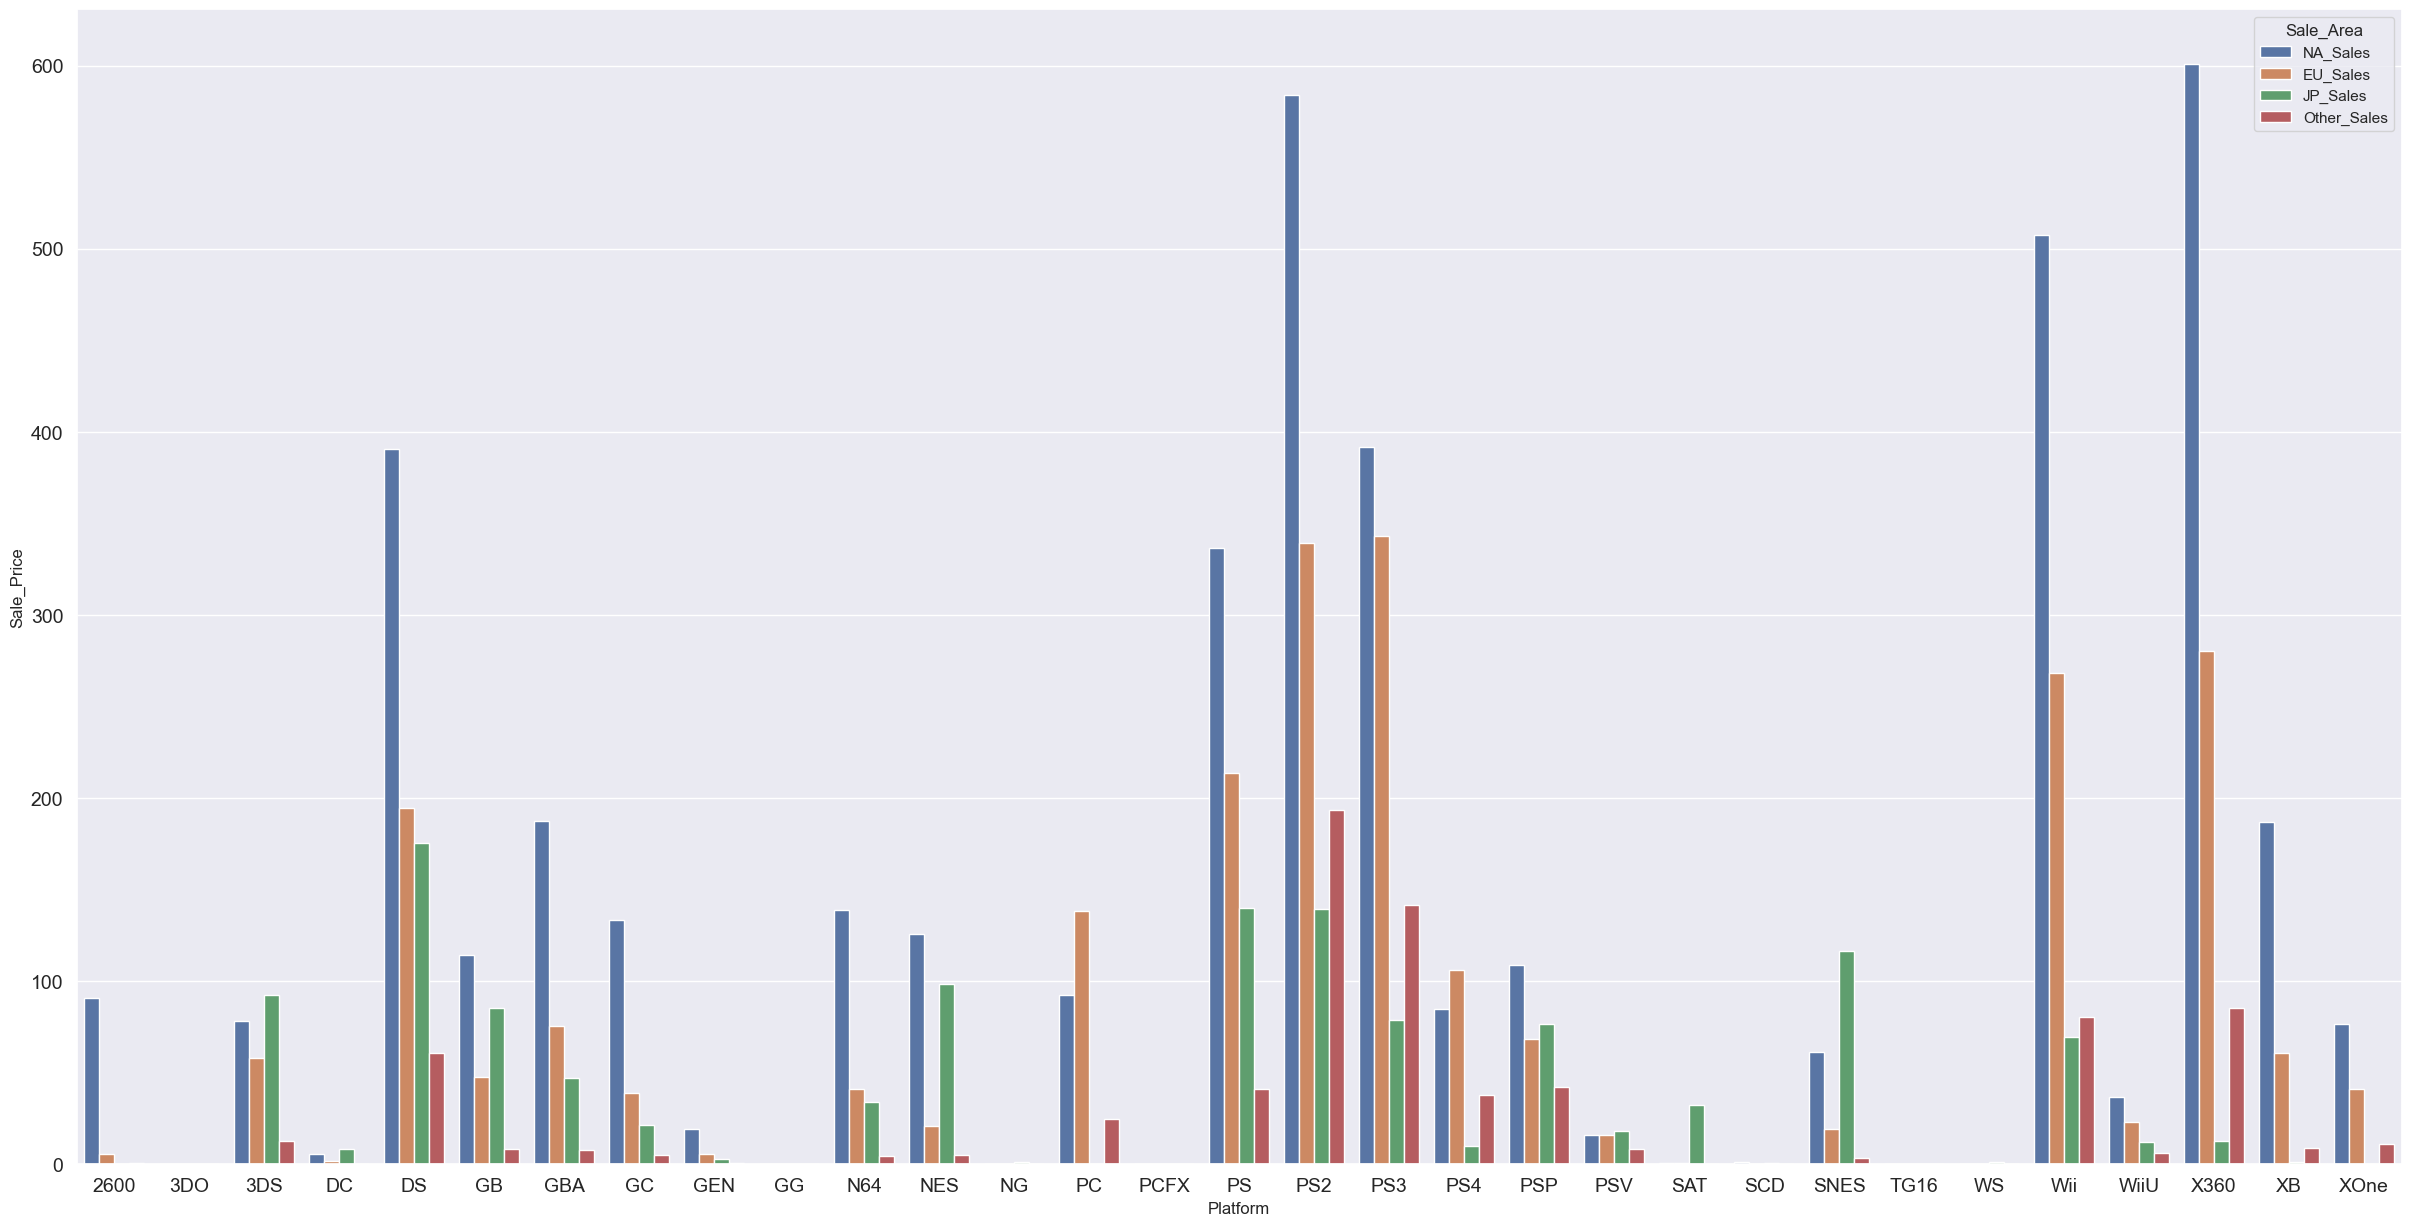

In [41]:
plt.figure(figsize=(30, 15))
sns.barplot(x="Platform", y="Sale_Price", hue="Sale_Area", data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

ME => It's clearly shown that X360, Wii, and PS are market leader. and north america always top. i have a question in my mind why they play video games most?


# 12.Top 20 Publisher


In [42]:
top_publisher = (
    data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).head(20)
)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

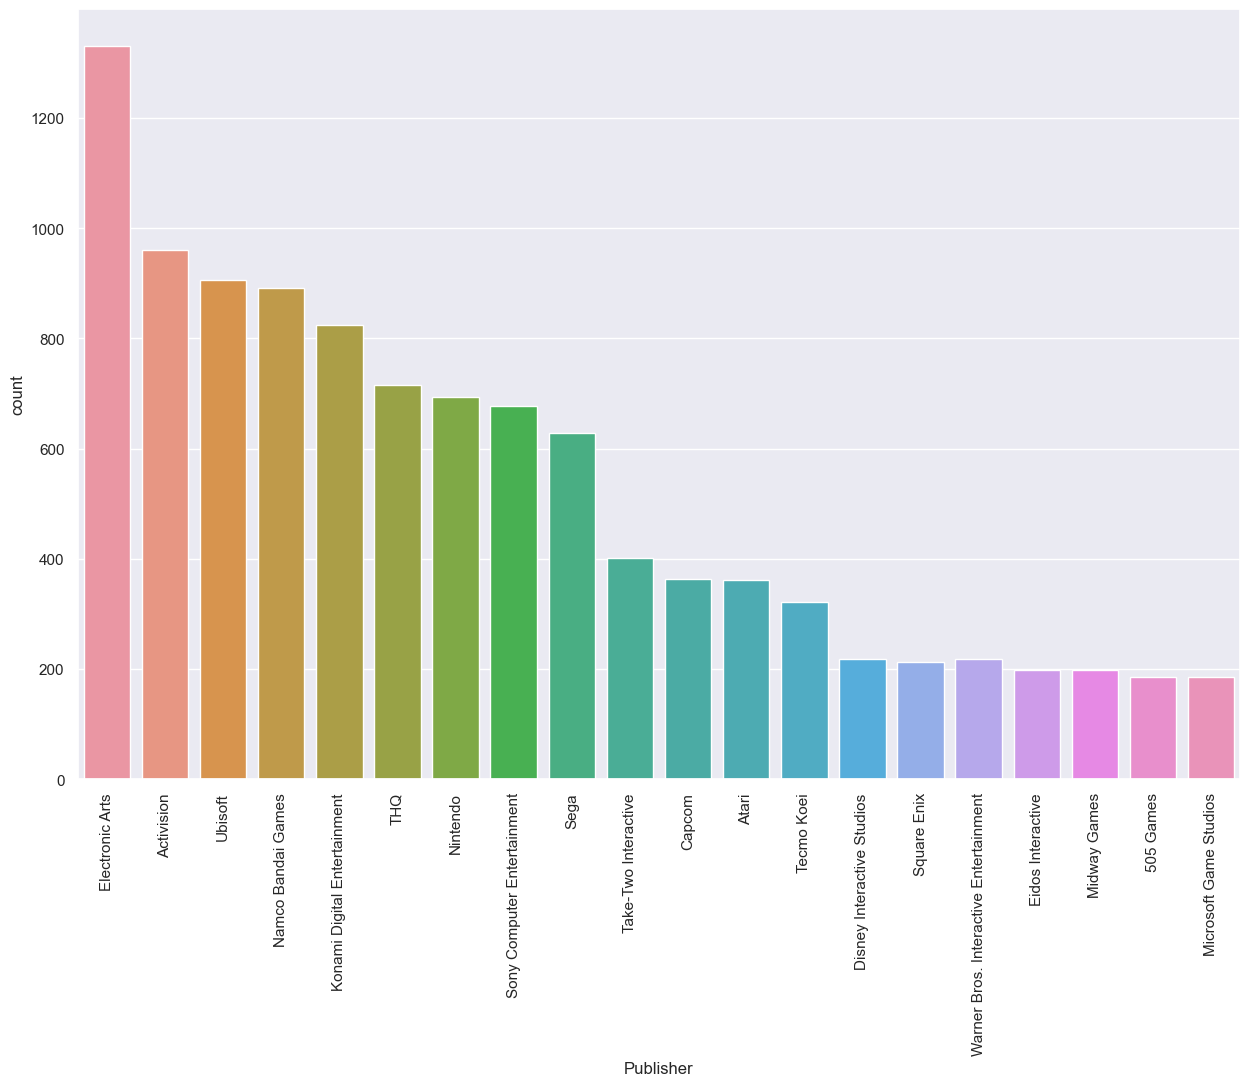

In [43]:
plt.figure(figsize=(15, 10))
sns.countplot(
    x="Publisher",
    data=data,
    order=data.groupby(by=["Publisher"])["Year"]
    .count()
    .sort_values(ascending=False)
    .iloc[:20]
    .index,
)
plt.xticks(rotation=90)

- Jaber => Electronic Arts 1339, its huge
- Me => Thank you EA Sports for giving us too many games.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

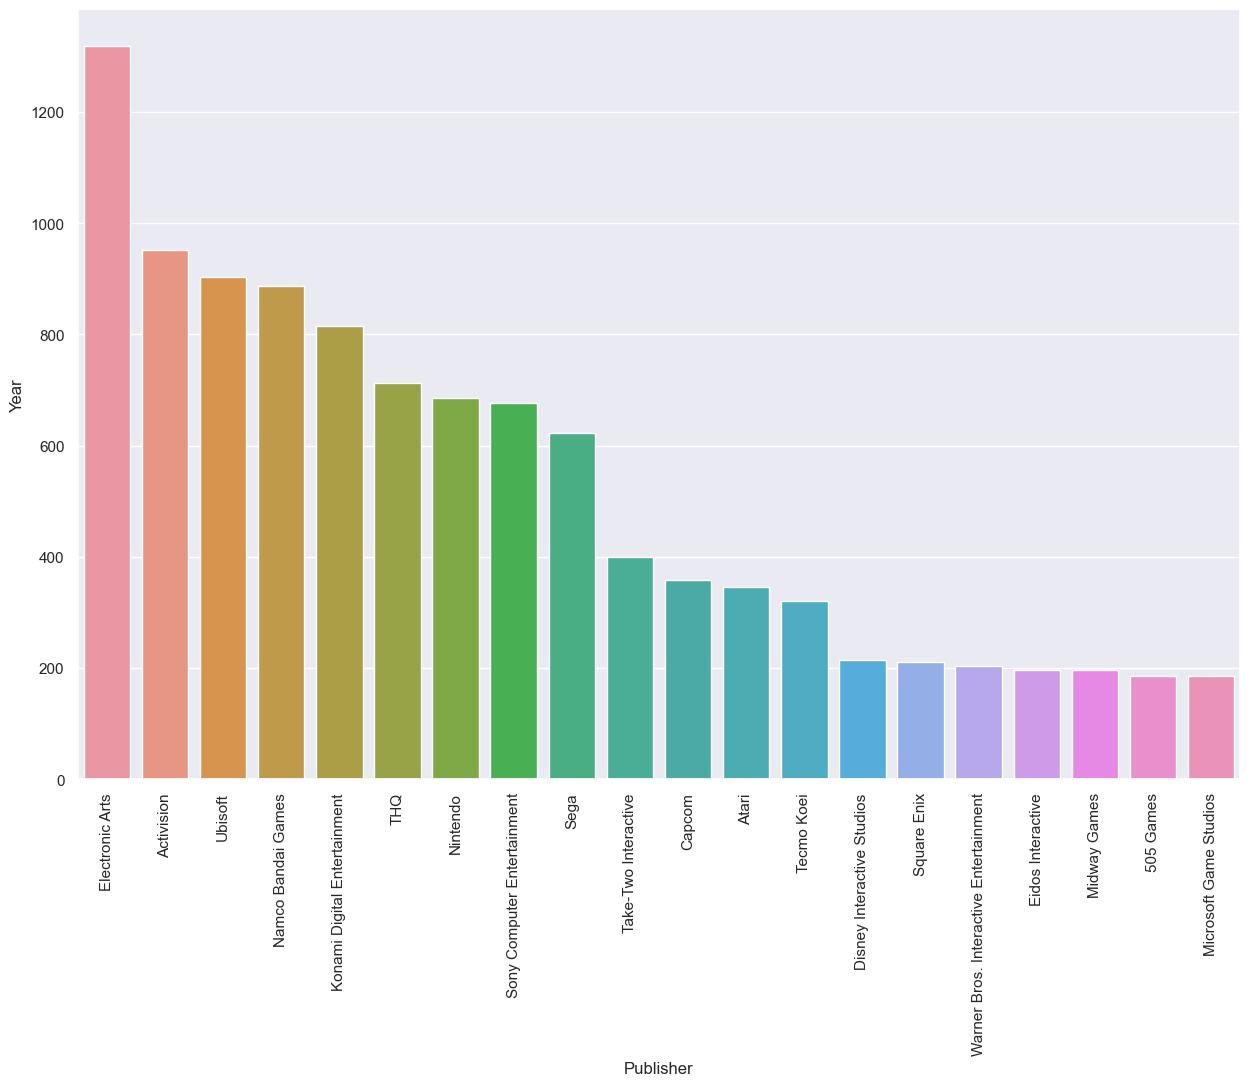

In [44]:
# Y 컬럼을 count로 업데트하고 이렇게 그릴 수 도 있었는데..
plt.figure(figsize=(15, 10))
sns.barplot(x="Publisher", y="Year", data=top_publisher)
plt.xticks(rotation=90)

# 13.Top global sales by publisher


In [45]:
sale_pbl = data[["Publisher", "Global_Sales"]]
sale_pbl = (
    sale_pbl.groupby(by=["Publisher"])["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
# sale_pbl

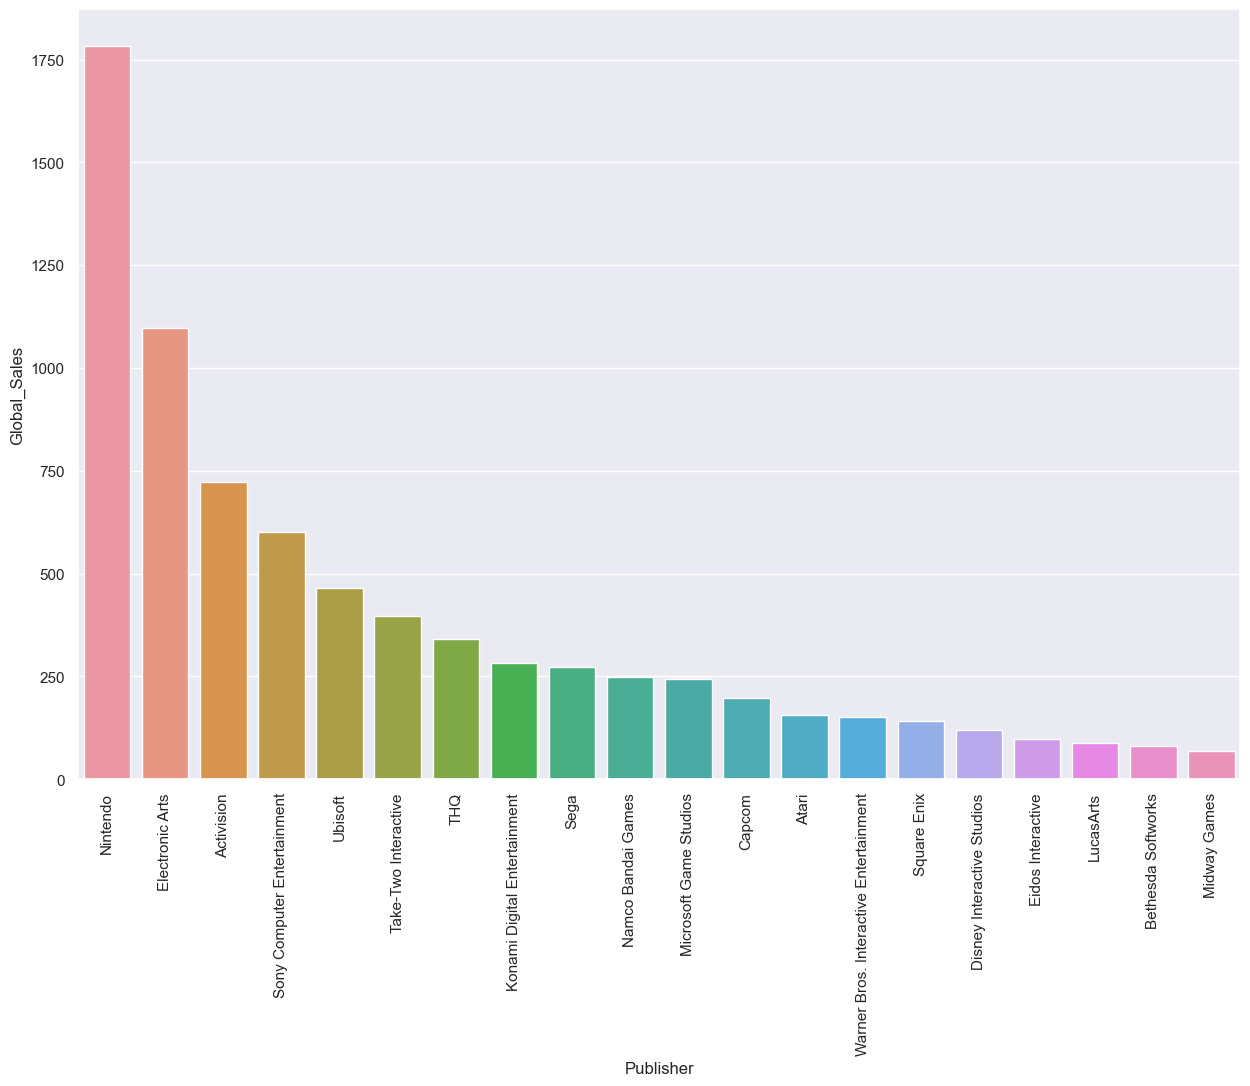

In [46]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Publisher", y="Global_Sales", data=sale_pbl)
plt.xticks(rotation=90)
plt.show()

1. ME => Wow its awesome Nintendo earns more rather than others. where respectively they are not releases much games.
2. Jaber => Till now Nintendo release 696 games. are you dont think its not huge?
3. Me => Yeah maybe, but they are not top 5 publisher


# 14.Publisher comperison


In [47]:
comp_publisher = data[
    ["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
]
comp_publisher

Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0        Nintendo     41.49     29.02      3.77         8.46         82.74
1        Nintendo     29.08      3.58      6.81         0.77         40.24
2        Nintendo     15.85     12.88      3.79         3.31         35.82
3        Nintendo     15.75     11.01      3.28         2.96         33.00
4        Nintendo     11.27      8.89     10.22         1.00         31.37
...           ...       ...       ...       ...          ...           ...
16593       Kemco      0.01      0.00      0.00         0.00          0.01
16594  Infogrames      0.01      0.00      0.00         0.00          0.01
16595  Activision      0.00      0.00      0.00         0.00          0.01
16596    7G//AMES      0.00      0.01      0.00         0.00          0.01
16597     Wanadoo      0.01      0.00      0.00         0.00          0.01

[16250 rows x 6 columns]

In [48]:
comp_publisher = (
    comp_publisher.groupby(by=["Publisher"])
    .sum()
    .reset_index()
    .sort_values(by=["Global_Sales"], ascending=False)
)
comp_publisher = comp_publisher.head(20)
# comp_publisher

In [49]:
comp_publisher = pd.melt(
    comp_publisher,
    id_vars=["Publisher"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name="Sale_Area",
    value_name="Sale_Price",
)
comp_publisher

Publisher    Sale_Area  Sale_Price
0                      Nintendo     NA_Sales      815.71
1               Electronic Arts     NA_Sales      591.43
2                    Activision     NA_Sales      428.03
3   Sony Computer Entertainment     NA_Sales      262.79
4                       Ubisoft     NA_Sales      249.31
..                          ...          ...         ...
75   Disney Interactive Studios  Other_Sales       13.18
76            Eidos Interactive  Other_Sales        8.02
77                    LucasArts  Other_Sales       10.50
78           Bethesda Softworks  Other_Sales        9.87
79                 Midway Games  Other_Sales        5.74

[80 rows x 3 columns]

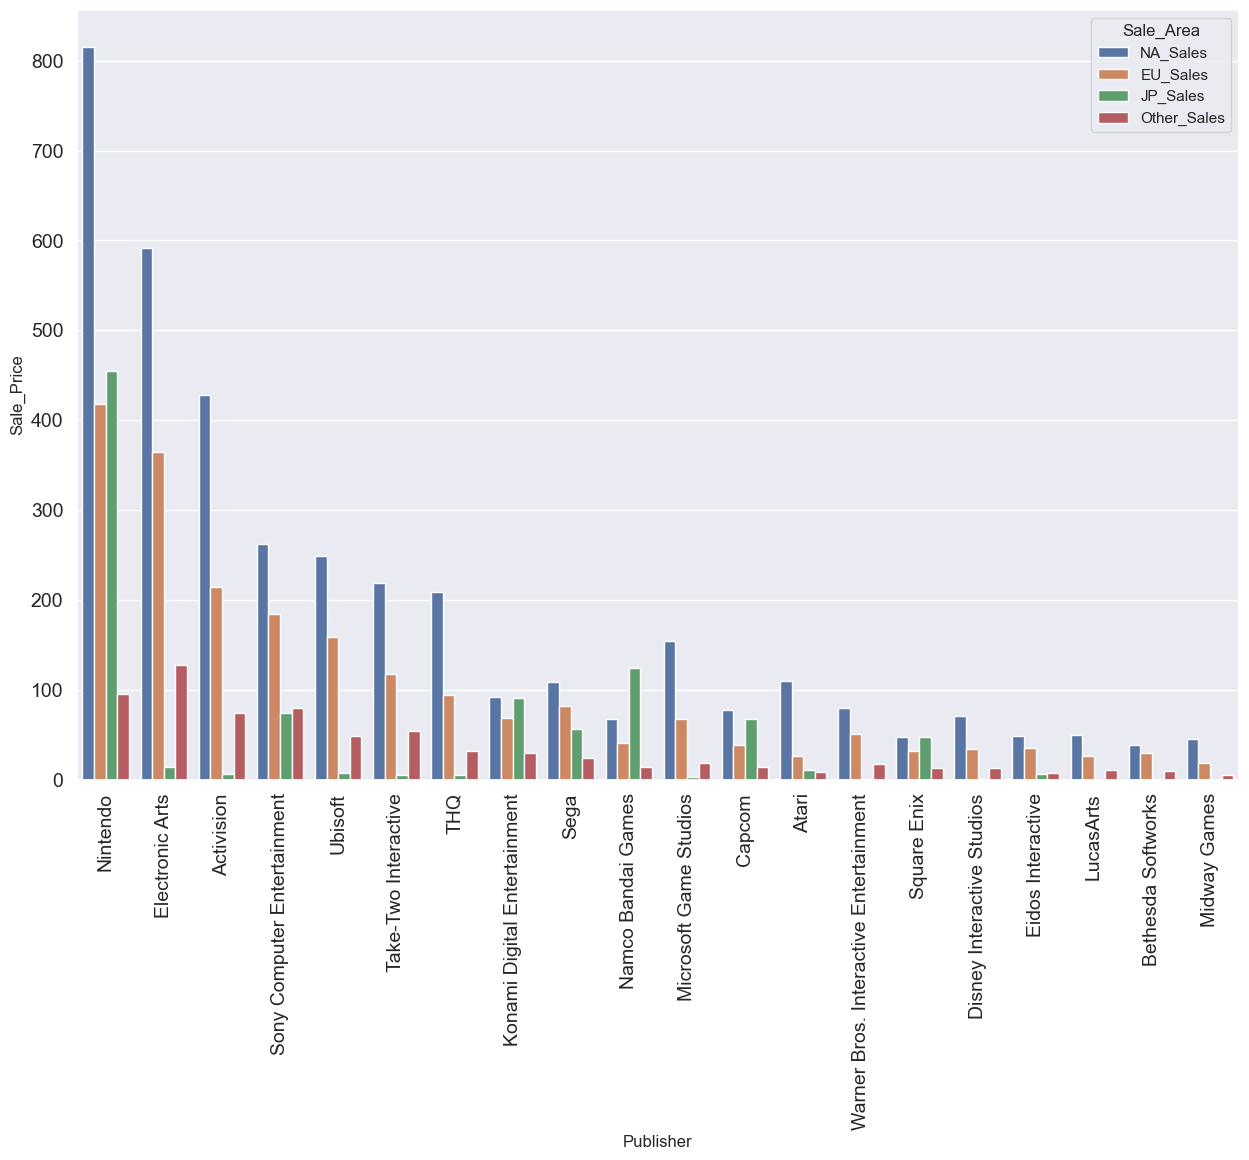

In [50]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Publisher", y="Sale_Price", hue="Sale_Area", data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# 15.Top publisher by Count each year


In [55]:
top_publisher = data[["Year", "Publisher"]]
top_publisher_df = (
    top_publisher.groupby(by=["Year", "Publisher"]).size().reset_index(name="Count")
)

top_publisher_idx = (
    top_publisher_df.groupby(by=["Year"])["Count"].transform(max)
    == top_publisher_df["Count"]
)

top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count = top_publisher_count.drop_duplicates(
    subset=["Year", "Count"], keep="last"
).reset_index(drop=True)
# top_publisher_count

Year                     Publisher  Count
0   1980.0                    Activision      5
1   1981.0                         Atari     11
2   1982.0                         Atari     14
3   1983.0                      Nintendo      6
4   1984.0                      Nintendo      9
5   1985.0                      Nintendo      7
6   1986.0                      Nintendo      6
7   1987.0                      Nintendo      4
8   1988.0                      Nintendo      6
9   1989.0                      Nintendo      9
10  1990.0                      Nintendo      7
11  1991.0                      Nintendo     13
12  1992.0                      Nintendo     10
13  1993.0                      Nintendo      9
14  1994.0                          Sega     26
15  1995.0   Sony Computer Entertainment     31
16  1996.0   Sony Computer Entertainment     28
17  1997.0   Sony Computer Entertainment     34
18  1998.0   Sony Computer Entertainment     30
19  1999.0  Konami Digital Entertainment     32
20  2000.0   Sony Computer Entertainment     32
21  2001.0               Electronic Arts     43
22  2002.0               Electronic Arts     88
23  2003.0               Electronic Arts     85
24  2004.0               Electronic Arts     86
25  2005.0               Electronic Arts    117
26  2006.0               Electronic Arts    102
27  2007.0               Electronic Arts    107
28  2008.0               Electronic Arts    120
29  2009.0                    Activision    121
30  2010.0                    Activision     89
31  2011.0                       Ubisoft     87
32  2012.0            Namco Bandai Games     85
33  2013.0            Namco Bandai Games     63
34  2014.0            Namco Bandai Games     69
35  2015.0            Namco Bandai Games     68

In [60]:
publisher = top_publisher_count["Publisher"]

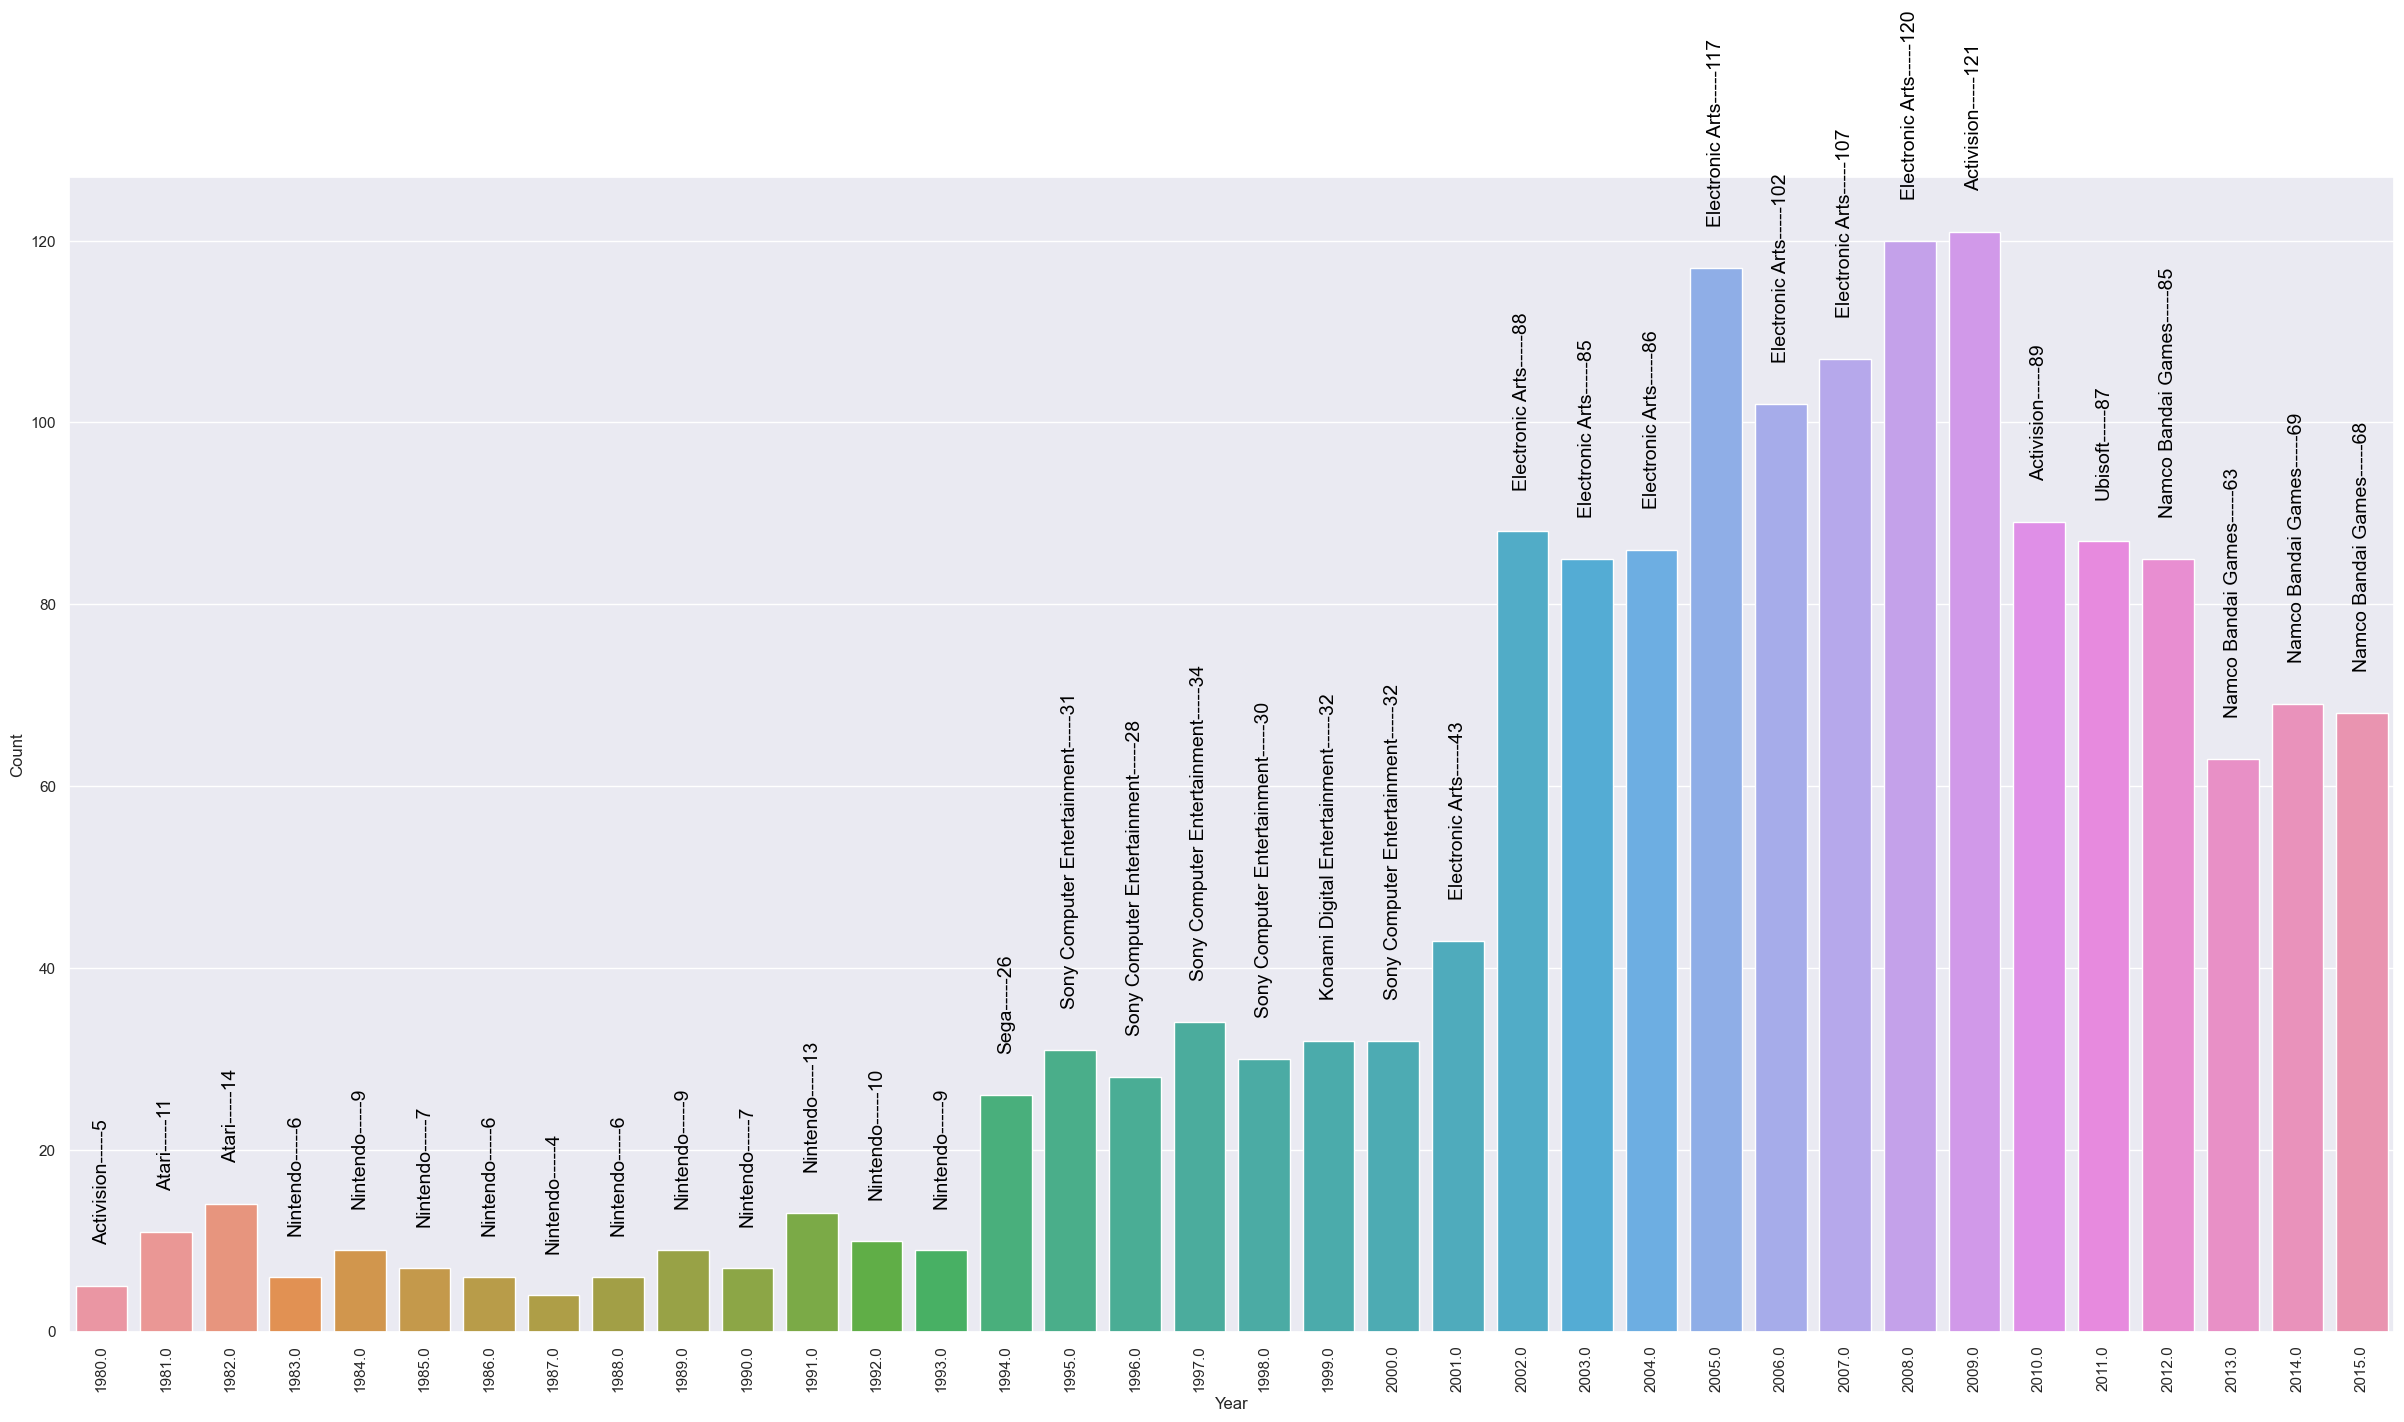

In [62]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x="Year", y="Count", data=top_publisher_count)
index = 0
for value in top_publisher_count["Count"].values:
    g.text(
        index,
        value + 5,
        str(publisher[index] + "-----" + str(value)),
        color="#000",
        size=14,
        rotation=90,
        ha="center",
    )
    index += 1

plt.xticks(rotation=90)
plt.show()

In [68]:
# 16.Total revenue by Region
# data.head()
top_sale_reg = data[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
# pd.DataFrame(top_sale_reg.sum(), columns = ['a','b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

region     sale
0     NA_Sales  4370.02
1     EU_Sales  2407.37
2     JP_Sales  1277.27
3  Other_Sales   789.98

<Axes: xlabel='region', ylabel='sale'>

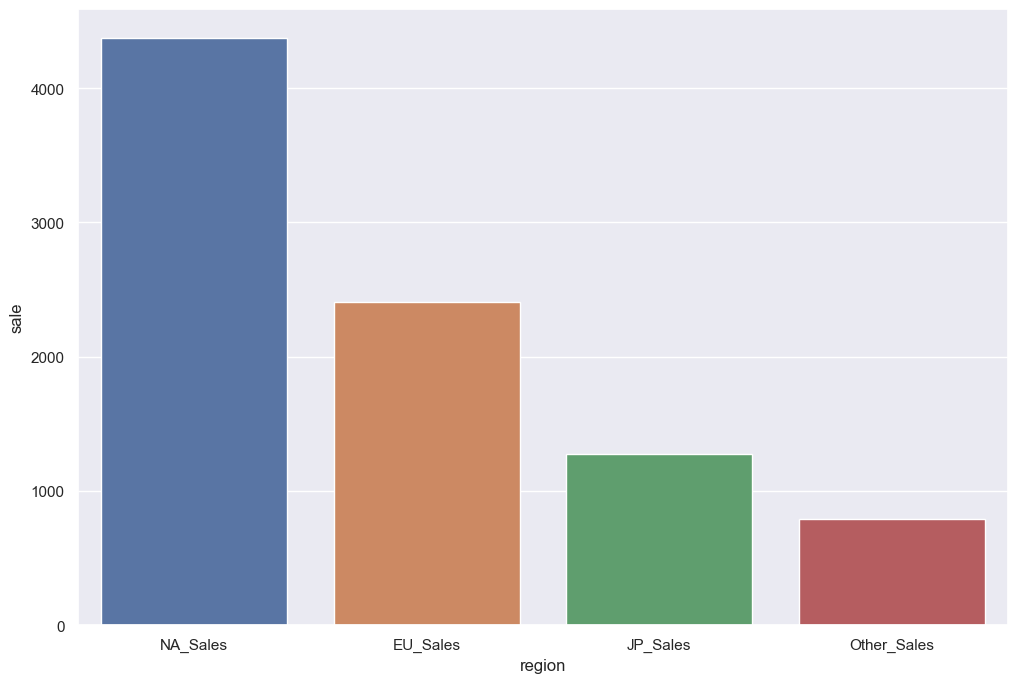

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x="region", y="sale", data=top_sale_reg)

pie chart of region sale


In [70]:
labels = top_sale_reg["region"]
sizes = top_sale_reg["sale"]

([<matplotlib.patches.Wedge at 0x2129cf1c4f0>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

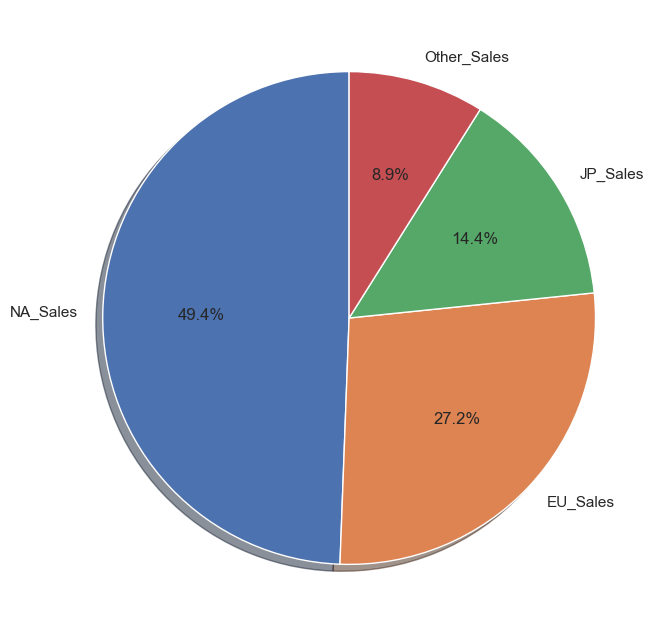

In [71]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

# 17.Sales Histogram


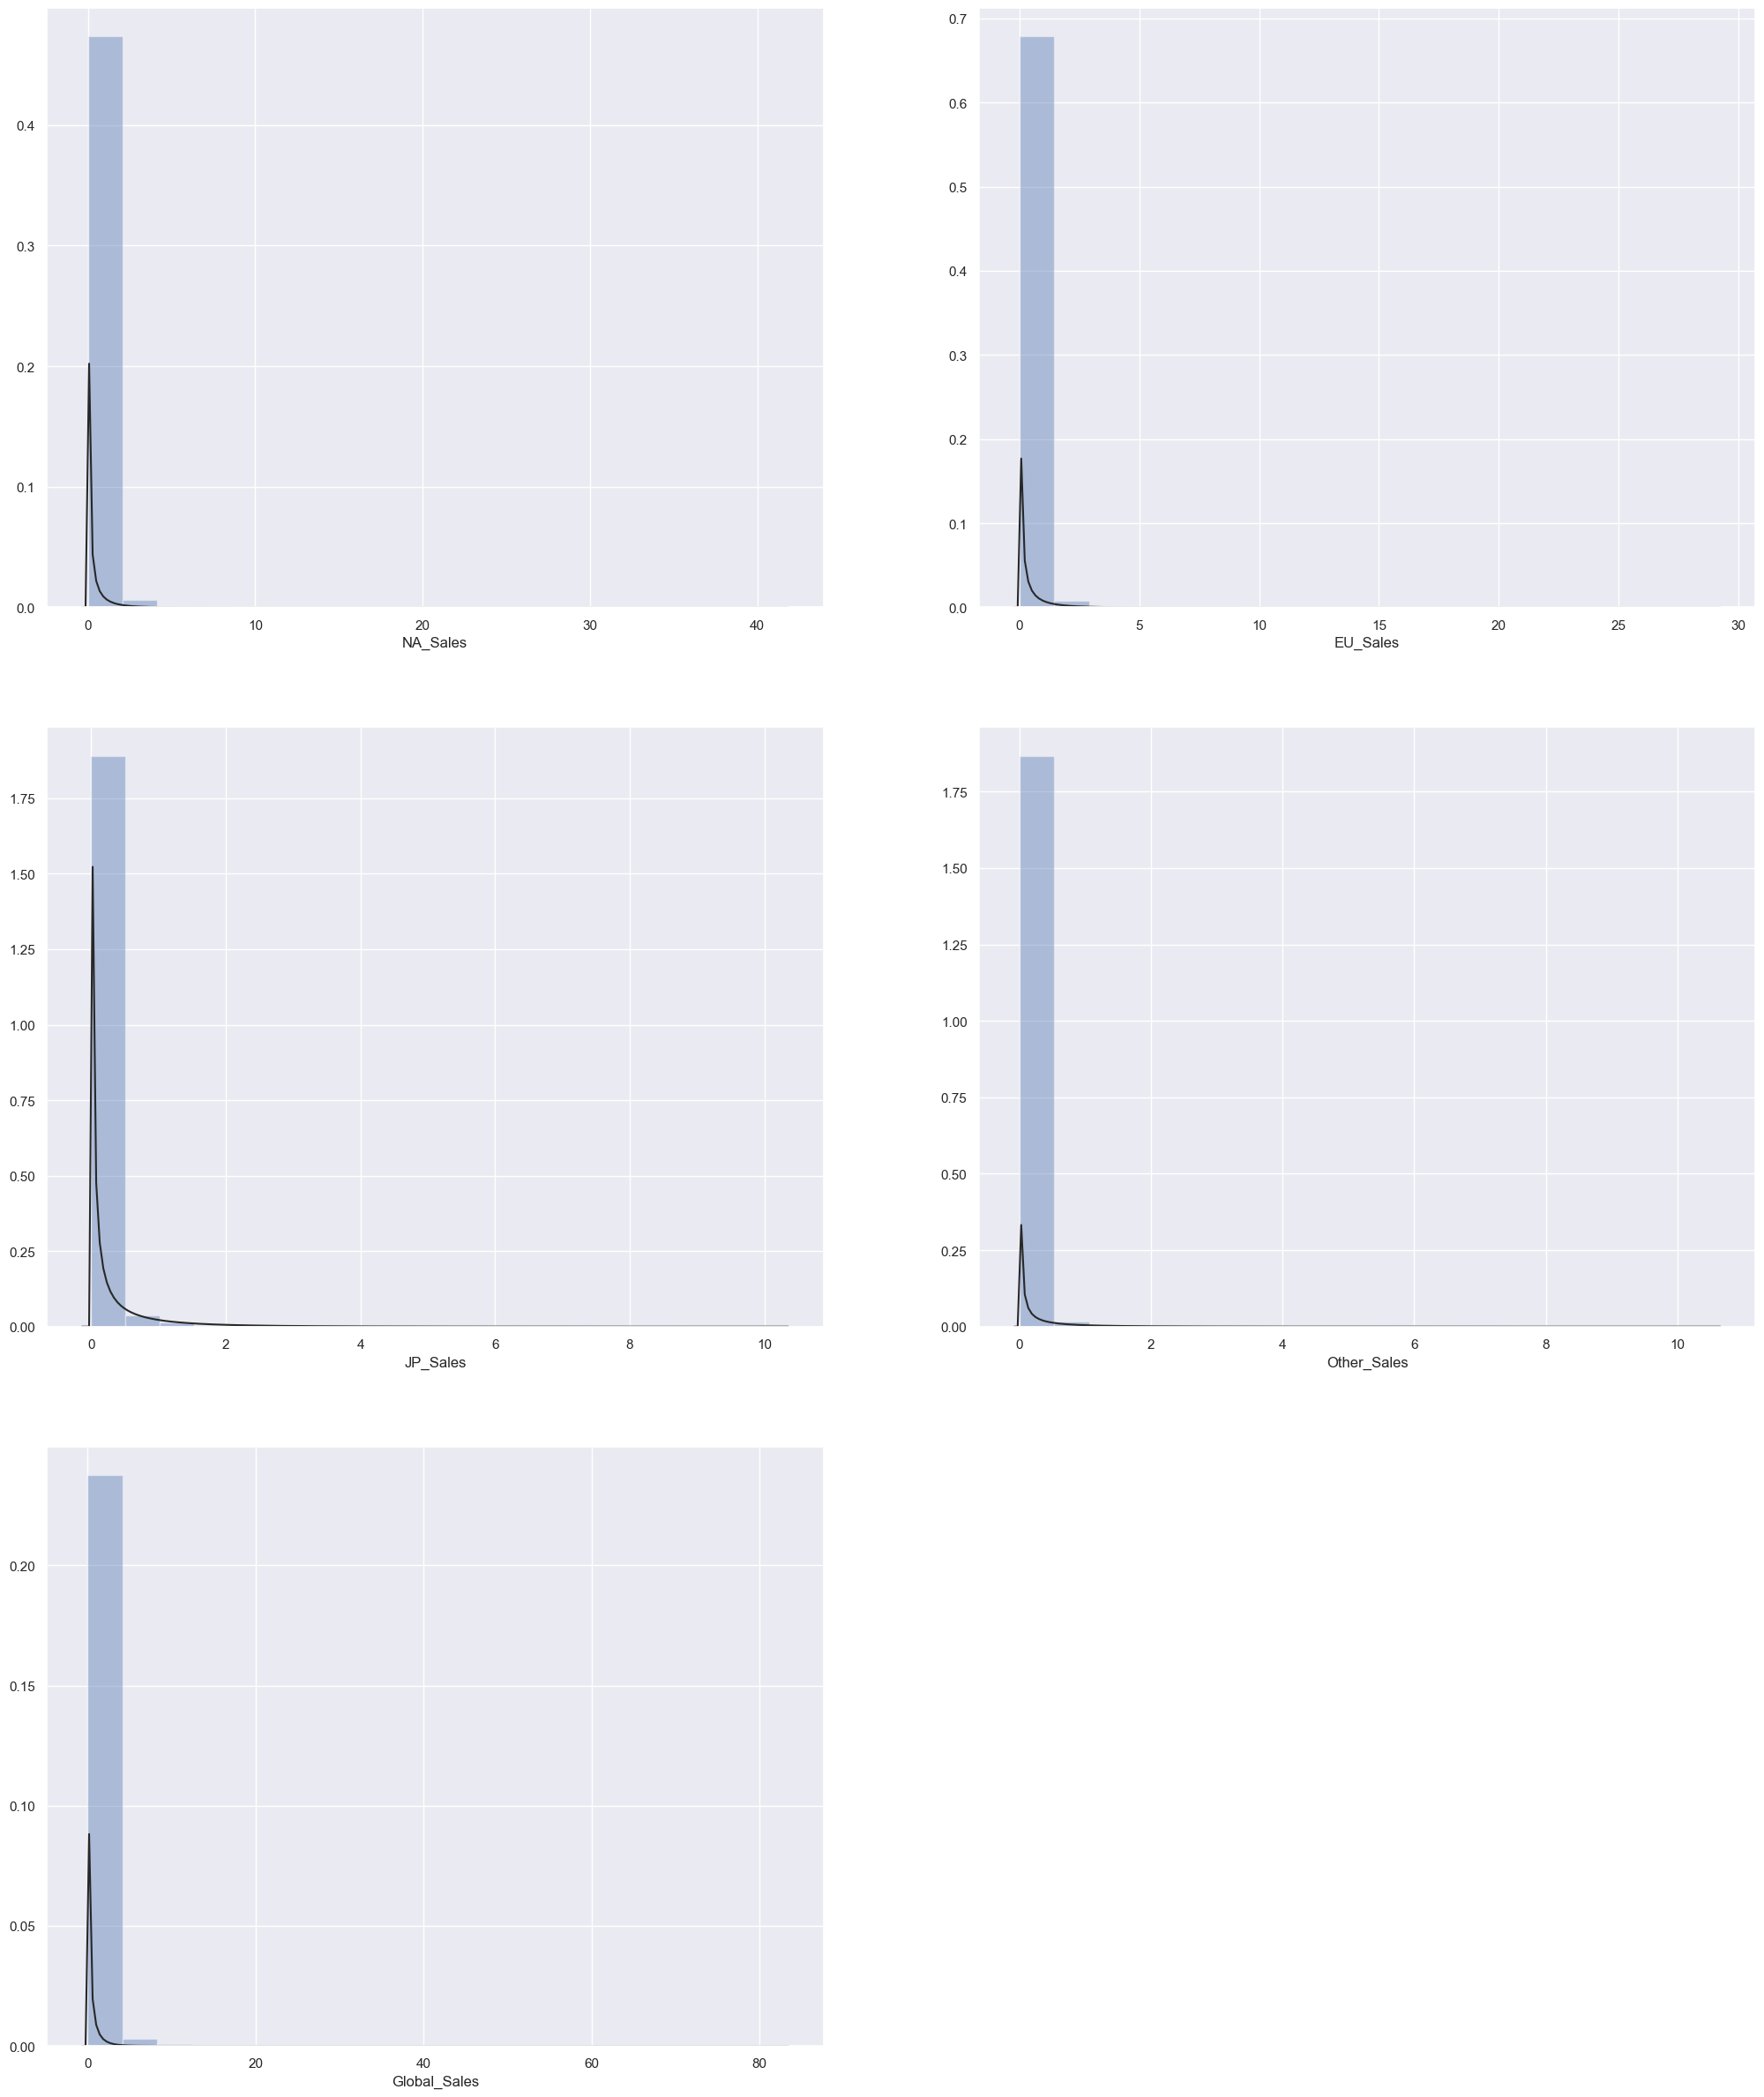

In [82]:
import warnings

warnings.filterwarnings("ignore")
# sns.distplot(data['NA_Sales'], kde=False, fit=stats.gamma)
# sns.distplot(data['EU_Sales'], kde=False, fit=stats.gamma)
plt.figure(figsize=(25, 30))
sales_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i + 1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

Distribution After log transformation


In [83]:
data_hist_log = data.copy()

In [86]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]



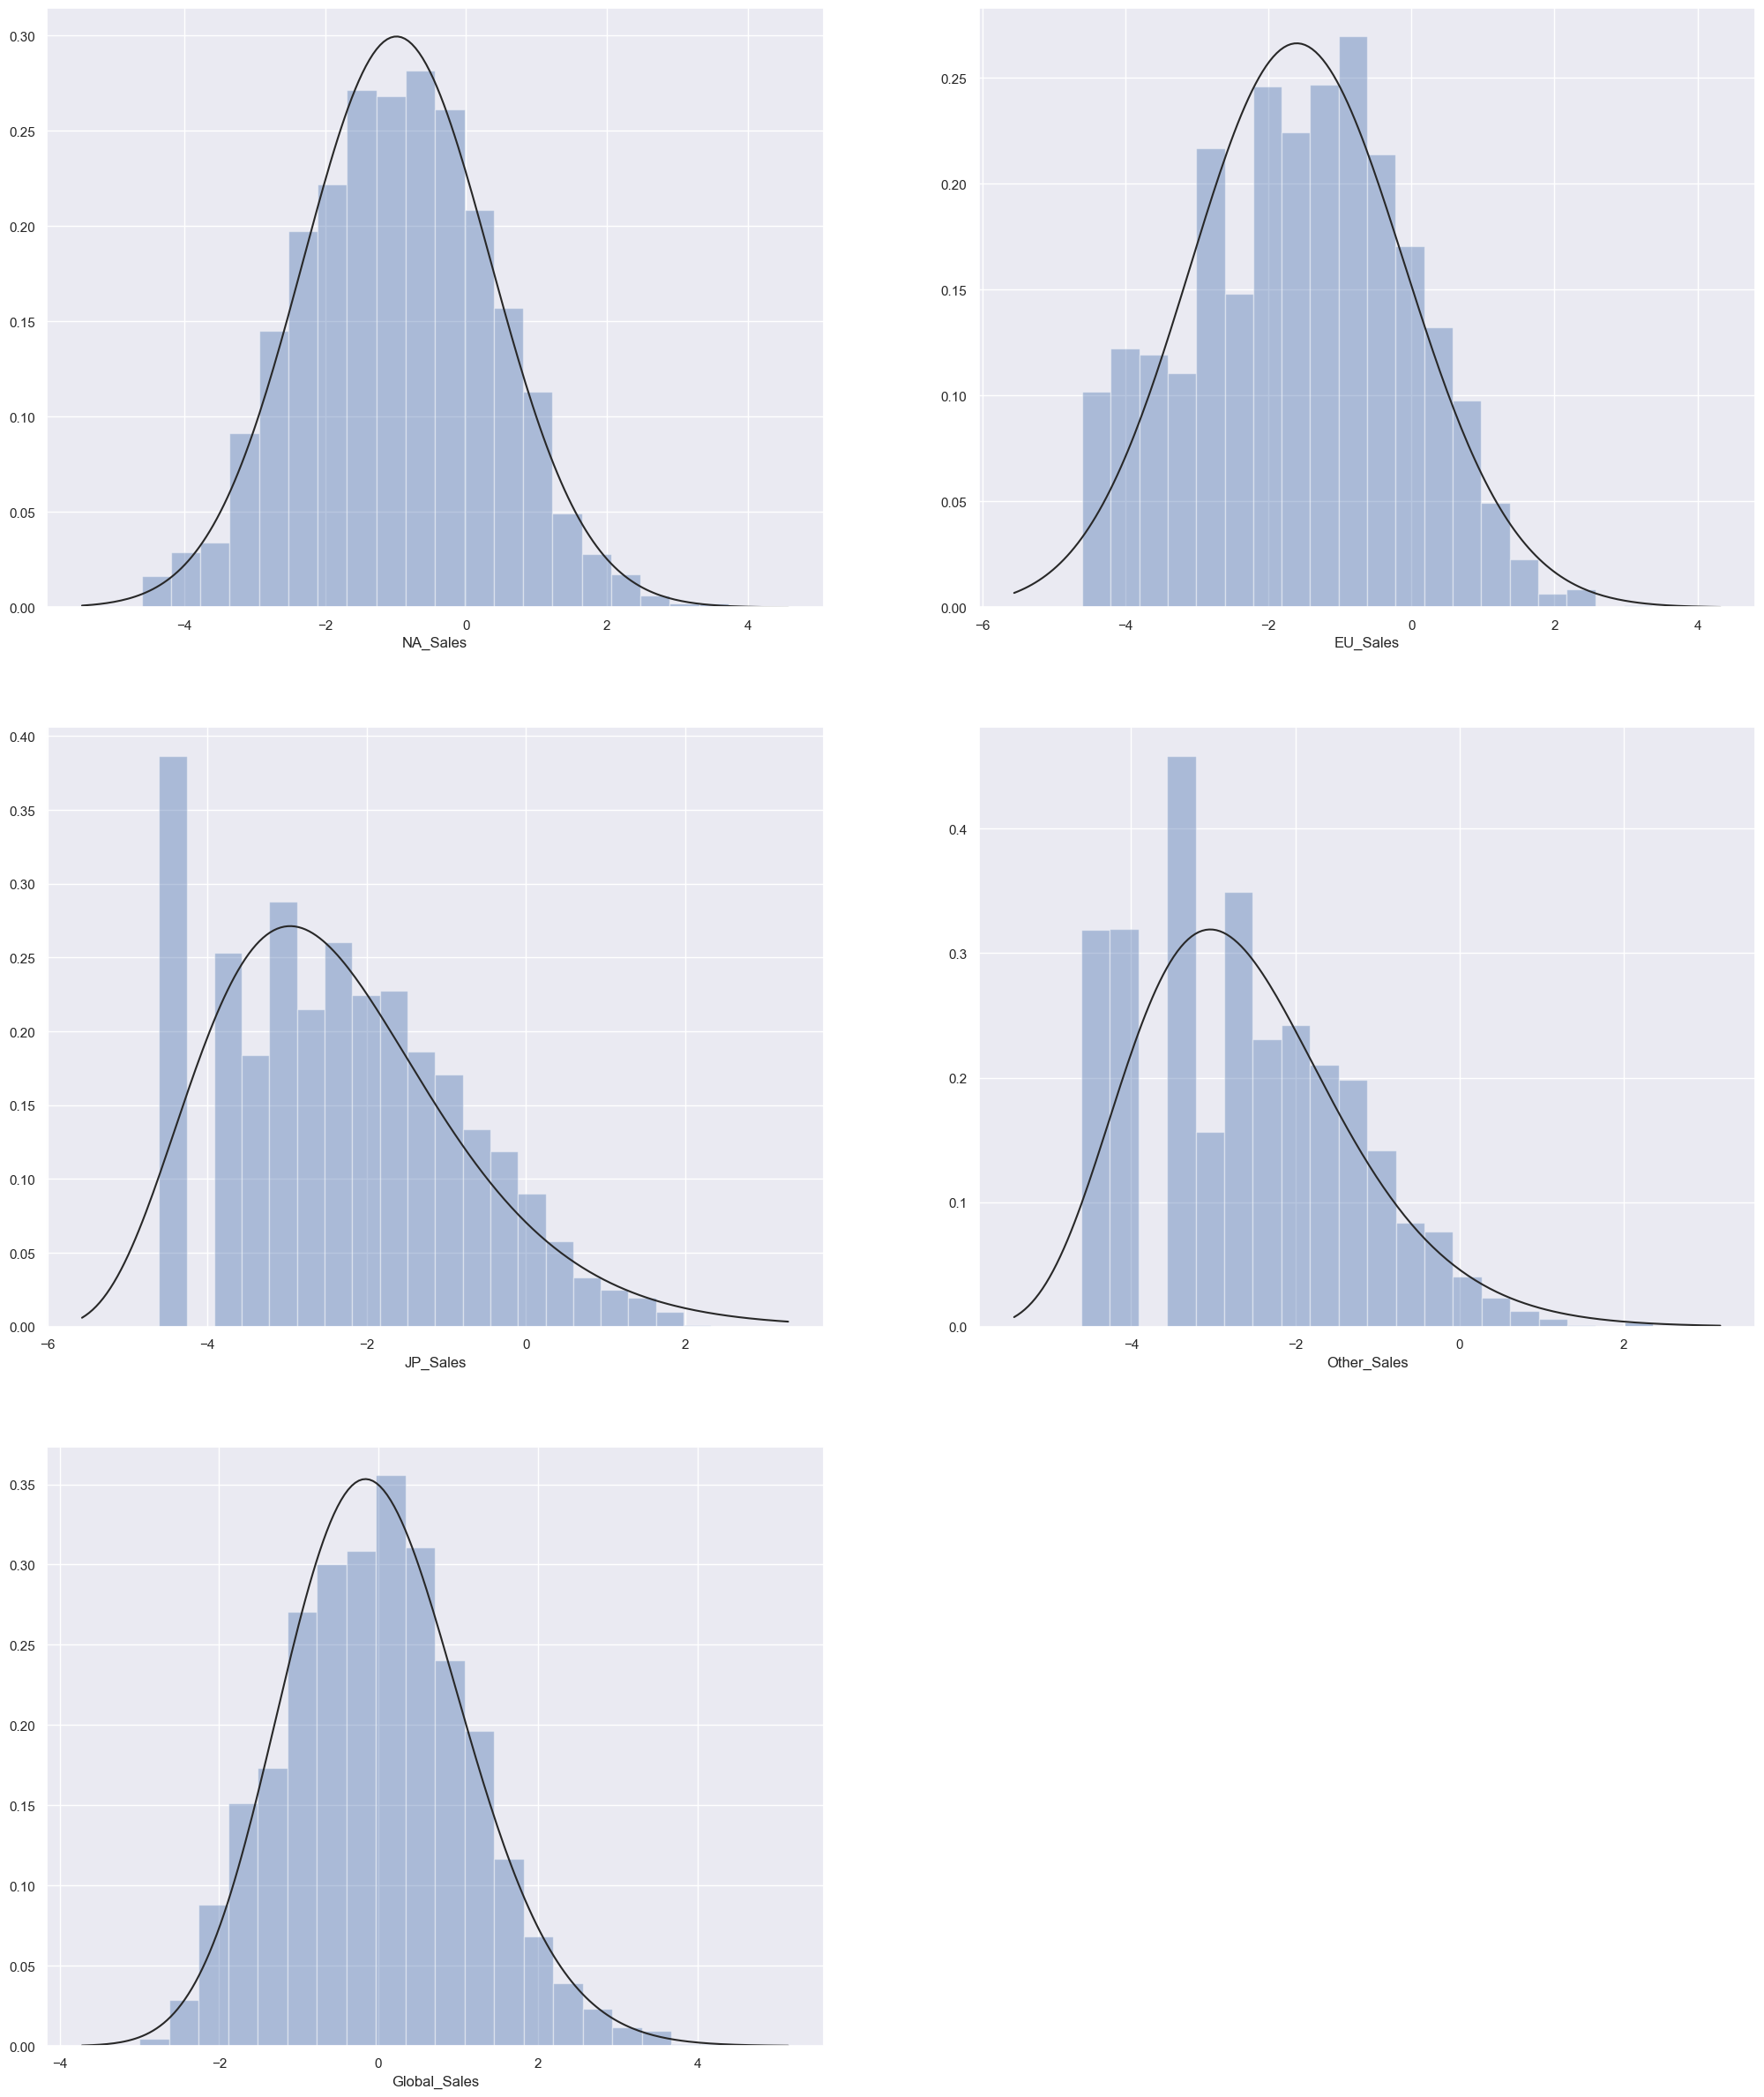

In [90]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

You can see their skewness and central tendency. we can say that our almost all data are right skewed and symmetric skewed after log transformation   
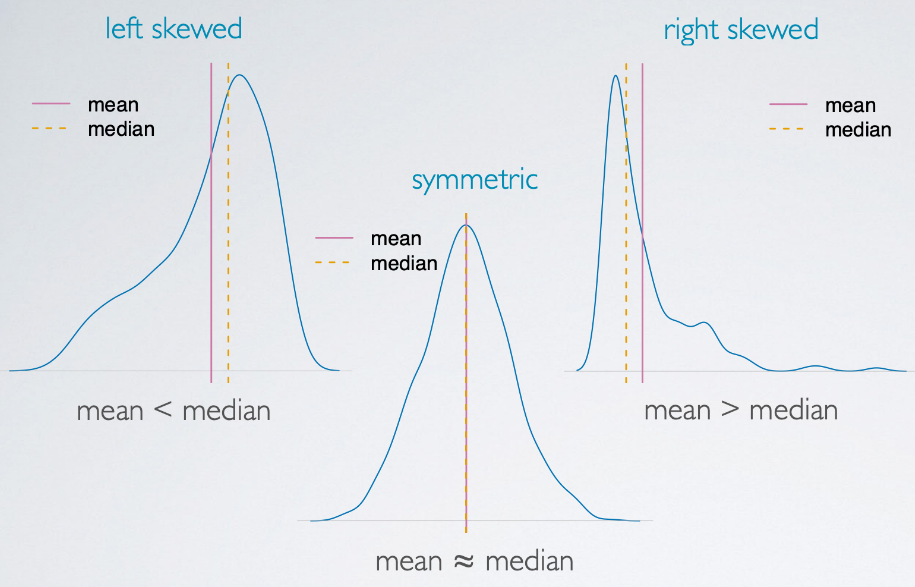

# 18. Relations of columns
heatmap   
heatmap is a good way to understand correlation.


<Axes: >

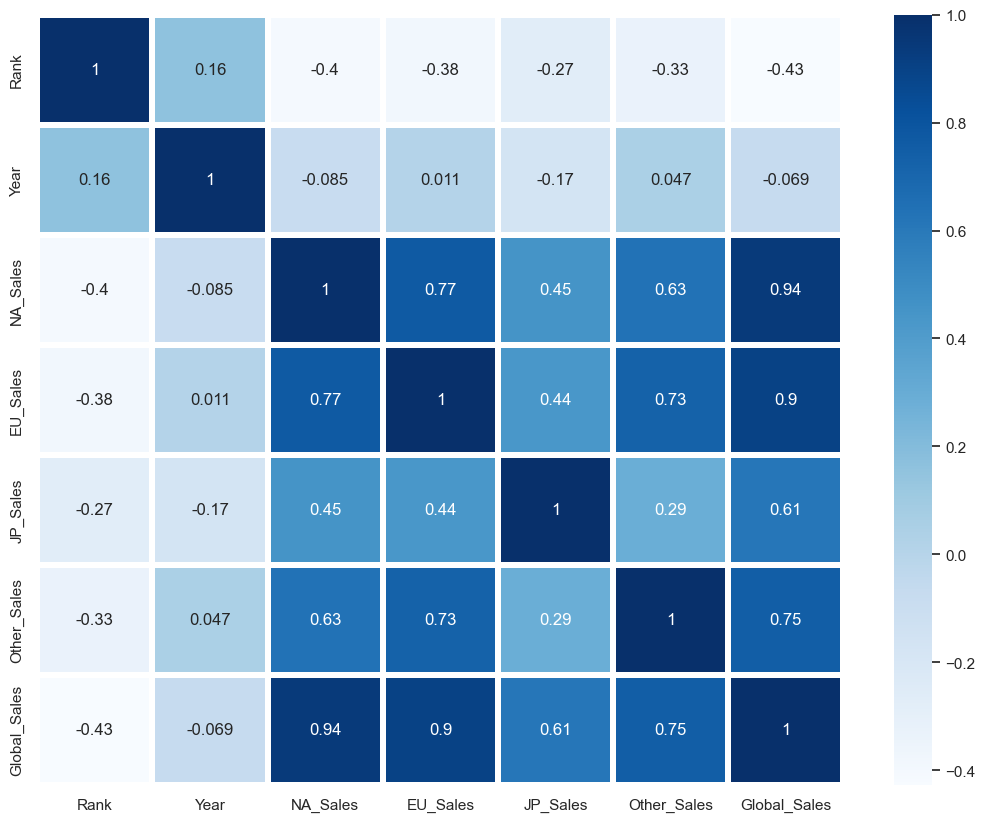

In [93]:
plt.figure(figsize=(13, 10))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True,  linewidth=3)

We can NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly corelated

Pair plot

In [112]:
data_pair = data.loc[:,['Year', 'Platform', 'Genre','NA_Sales', 'EU_Sales',  'Other_Sales']]
# data[['Year', 'Platform', 'Genre','NA_Sales', 'EU_Sales',  'Other_Sales']]  # 뭐가 다르지?
data_pair

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
16593  2002.0      GBA      Platform      0.01      0.00         0.00
16594  2003.0       GC       Shooter      0.01      0.00         0.00
16595  2008.0      PS2        Racing      0.00      0.00         0.00
16596  2010.0       DS        Puzzle      0.00      0.01         0.00
16597  2003.0      GBA      Platform      0.01      0.00         0.00

[16250 rows x 6 columns]

In [113]:
data[['Year', 'Platform', 'Genre','NA_Sales', 'EU_Sales', 'Other_Sales']]

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
16593  2002.0      GBA      Platform      0.01      0.00         0.00
16594  2003.0       GC       Shooter      0.01      0.00         0.00
16595  2008.0      PS2        Racing      0.00      0.00         0.00
16596  2010.0       DS        Puzzle      0.00      0.01         0.00
16597  2003.0      GBA      Platform      0.01      0.00         0.00

[16250 rows x 6 columns]

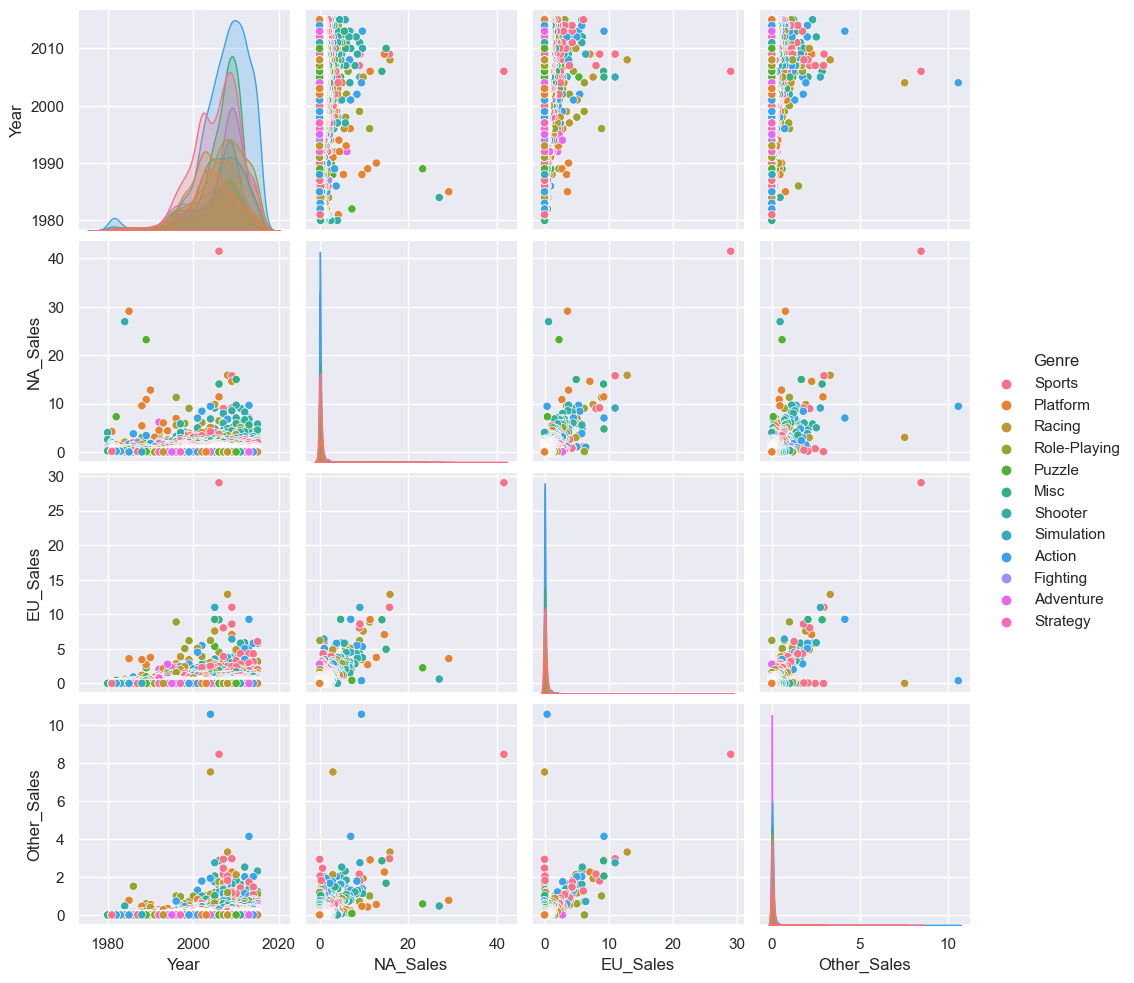

In [114]:
sns.pairplot(data_pair, hue='Genre')

### log work

In [115]:
data_pair_log = data_pair.copy()

In [116]:
sales_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [104]:
# for column in sales_columns:
#     if 0 in data[column].unique():
#         pass
#     else:
#         data_pair_log[column] = np.log(data_pair_log[column])
#         data_pair_log.head()


In [117]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [118]:
data_pair_log

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
14071  1998.0       PC  Role-Playing      0.01      0.02         0.01
14183  2014.0      PS3        Racing      0.02      0.01         0.01
14185  2011.0       PC        Puzzle      0.01      0.02         0.01
14267  2007.0       PC        Puzzle      0.01      0.02         0.01
14299  2009.0       PC      Strategy      0.01      0.02         0.01

[7893 rows x 6 columns]

In [119]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales'])
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales'])
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales'])

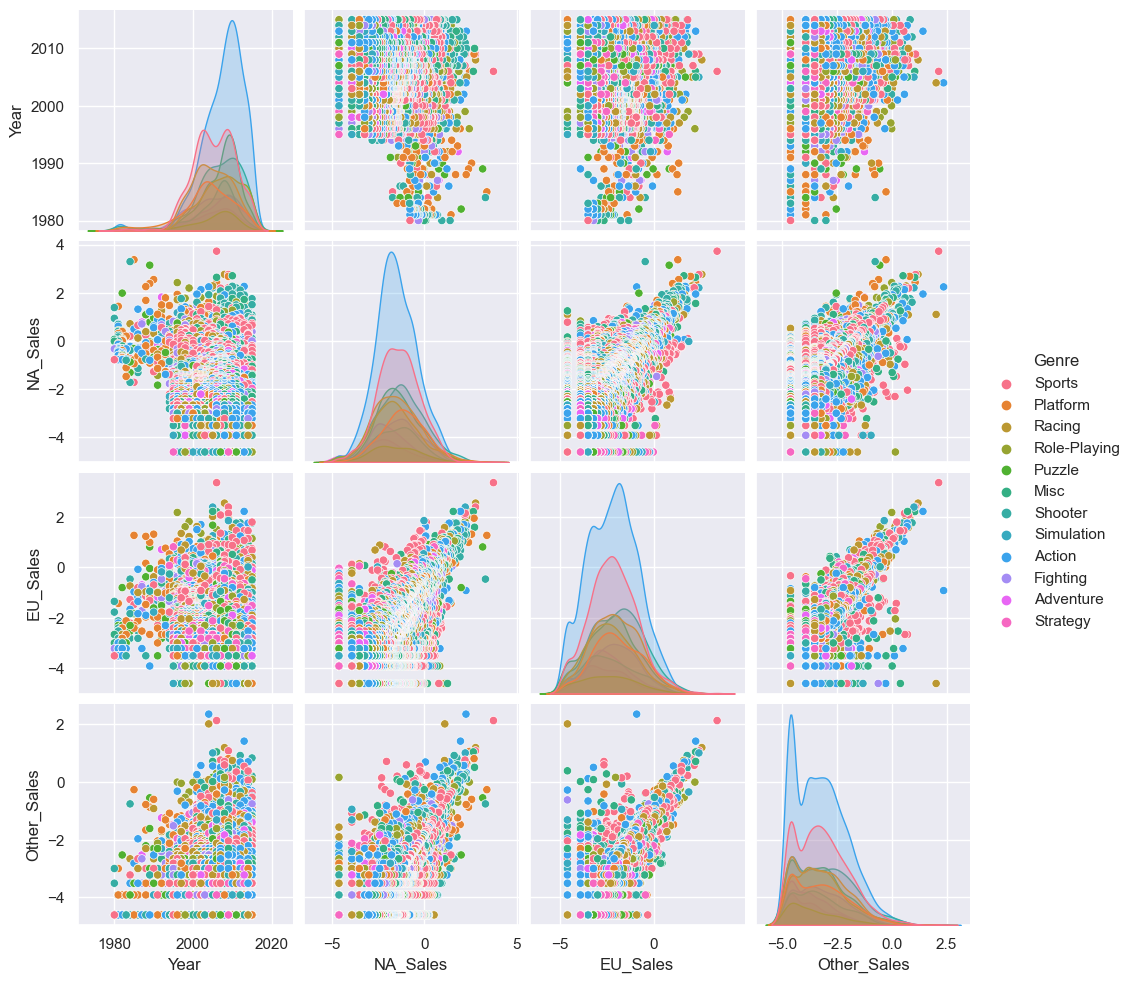

In [121]:
#sns.pairplot(data_pair_log, hue = 'Genre', diag_kind = 'kde',
#                                   plot_kws = {'alpha':0.6, 's':80, 'edgecolor':'k'},
#                                   size =4)

sns.pairplot(data_pair_log, hue ='Genre', palette='husl')

- Me => Ok thats all jaber. are you get all your question answer.
- Jaber => Yah i get, but i have also some questions yet.
- Me => Not today jaber, it's already late night we will do it another day. ok.
- Jaber => Okk.

### Note:
You already find out that it was just a imaginary story. But truly jaber is real person,   
he is my room mate also and he loves game too much. I just imagin this story and made it with a little fun. Hope you like it.

# 회고

- DataFrame을 이용해 집계를 해서 그래프로 그려주는 끝판왕!!이다. 
- 정말 도움이 많이 되었던 예시다. 
- transform, melt, pairplot 등등. 
- 숨긴 기능으로 숨겨두고 안보고 짤 수 있을 정도로 연습을 해야 할 듯 하다.